# 1. Data exploration

### 1.1. Suppose you've got an XML-file and want to build something useful. Take a look at it.

In [1]:
!head -n 25 ../data/001.xml

<?xml version="1.0"?>
<xf>
  <reactions>
    <reaction index="26">
      <RX>
        <RX.ID>9185275</RX.ID>
        <RX01>
          <RX.RXRN>1706223</RX.RXRN>
          <RX.RCT>L-leucine tert-butyl ester</RX.RCT>
        </RX01>
        <RX01>
          <RX.RXRN>9297179</RX.RXRN>
          <RX.RCT>(S)-2-[[[(1,3-dioxo-1,3-dihydro-2H-isoindol-2-yl)methyl]diphenylsilanyl]methyl]-4-methylpentanoic acid</RX.RCT>
        </RX01>
        <RX02>
          <RX.PXRN>9307186</RX.PXRN>
          <RX.PRO>(S)-2-[(S)-2-[[[(1,3-dioxo-1,3-dihydro-2H-isoindol-2-yl)methyl]diphenylsilanyl]methyl]-4-methylpentanoylamino]-4-methylpentanoic acid tert-butyl ester</RX.PRO>
        </RX02>
        <RX.BLB>1706223</RX.BLB>
        <RX.BLB>9297179</RX.BLB>
        <RX.BLB>9307186</RX.BLB>
        <RX.BLC>1706223</RX.BLC>
        <RX.BLC>9297179</RX.BLC>
        <RX.BLC>9307186</RX.BLC>
        <RX.NVAR>1</RX.NVAR>


### 1.2. Parse
lxml is the fastest way to process xml file in Python.

In [2]:
from lxml import etree as ElementTree

In [3]:
tree = ElementTree.parse("../data/001.xml")
root = tree.getroot()

In [4]:
root.getchildren()

[<Element reactions at 0x7f8340089748>]

In [5]:
len(root.getchildren()[0].getchildren())

2977

In [6]:
root.getchildren()[0].getchildren()[0].getchildren()

[<Element RX at 0x7f83400136c8>,
 <Element RXD at 0x7f8340013748>,
 <Element RY at 0x7f8340013a08>]

### 1.3. RX
What is RX?

In [7]:
rx, rxd, ry = root.getchildren()[0].getchildren()[0].getchildren()

In [8]:
rx.getchildren()

[<Element RX.ID at 0x7f8340089b08>,
 <Element RX01 at 0x7f8340013b88>,
 <Element RX01 at 0x7f8340013b48>,
 <Element RX02 at 0x7f8340013bc8>,
 <Element RX.BLB at 0x7f8340013d08>,
 <Element RX.BLB at 0x7f8340013d48>,
 <Element RX.BLB at 0x7f8340013d88>,
 <Element RX.BLC at 0x7f8340013dc8>,
 <Element RX.BLC at 0x7f8340013e08>,
 <Element RX.BLC at 0x7f8340013e48>,
 <Element RX.NVAR at 0x7f8340013e88>,
 <Element RX03 at 0x7f8340013ec8>,
 <Element RX04 at 0x7f8340013f08>,
 <Element RX.RXNFILE at 0x7f8340013f48>,
 <Element RX.REG at 0x7f8340013f88>,
 <Element RX.RANK at 0x7f8340013fc8>,
 <Element RX.MYD at 0x7f834008b048>,
 <Element RX.SKW at 0x7f834008b088>,
 <Element RX.RTYP at 0x7f834008b0c8>,
 <Element RX.RTYP at 0x7f834008b108>,
 <Element RX.RAVAIL at 0x7f834008b148>,
 <Element RX.PAVAIL at 0x7f834008b188>,
 <Element RX.MAXPUB at 0x7f834008b1c8>,
 <Element RX.NUMREF at 0x7f834008b208>,
 <Element RX.MAXPMW at 0x7f834008b248>,
 <Element RX.ED at 0x7f834008b288>,
 <Element RX.UPD at 0x7f834

RX01, RX02 are reactants and products respectively.

In [9]:
print("Reactant #1:", rx[1].getchildren()[1].text)
print("Reactant #2:", rx[2].getchildren()[1].text)
print("Product:", rx[3].getchildren()[1].text)

Reactant #1: L-leucine tert-butyl ester
Reactant #2: (S)-2-[[[(1,3-dioxo-1,3-dihydro-2H-isoindol-2-yl)methyl]diphenylsilanyl]methyl]-4-methylpentanoic acid
Product: (S)-2-[(S)-2-[[[(1,3-dioxo-1,3-dihydro-2H-isoindol-2-yl)methyl]diphenylsilanyl]methyl]-4-methylpentanoylamino]-4-methylpentanoic acid tert-butyl ester


What are RX03 and RX04?

In [10]:
print(ElementTree.tostring(rx[11]).decode("utf-8"))

<RX03>
          <RX.BCODE>261039242542204</RX.BCODE>
          <RX.MCODE>325399193666863</RX.MCODE>
          <RX.NCODE>334727620812468</RX.NCODE>
        </RX03>
        


In [11]:
print(ElementTree.tostring(rx[12]).decode("utf-8"))

<RX04>
          <RX.TRANS highlight="true"><hi>0/80F51(0205)|80F42(030406)|40F61()|01E62()|01E41(0708)|01E41(090A)|01D42(0C0D)|01D41(0E)|01D41(0B)|01D41(0F)|01CB1(101113)|01C62()|01C61(12)|01C41(1415)|01C41(1617)|01B45(191A)|01B45(1B1C)|01B41(1D1E1F)|01B41(18)|01B41()|01B41()|01B41()|01B41()|01A51(2425)|01A45(20)|01A45(21)|01A45(22)|01A45(23)|01A41()|01A41()|01A41()|01945(2A)|01945(2A)|01945(2B)|01945(2B)|01942(2628)|01942(2729)|01862()|01862()|01845(292C)|01845(2D)|01845()|01845()|01745(2E)|01745(2F)|01645(2F)|01645()|</hi></RX.TRANS>
          <RX.BIN>283141</RX.BIN>
          <RX.BFREQ>469</RX.BFREQ>
          <RX.BRANGE>282515-283231</RX.BRANGE>
          <RX.BNAME>NH2 + -(C=)-O- to -NH-C(=)-</RX.BNAME>
          <RX.QRY0>0/80F51(02*)|80F42(03*)|40F61()|*</RX.QRY0>
          <RX.QRY1>0/80F51(02*)|80F42(03*)|40F61()|01E62(*)|01E41(*)|01E41(*)|*</RX.QRY1>
          <RX.QRY2>0/80F51(0205)|80F42(030406)|40F61()|01E62(*)|01E41(*)|01E41(*)|*</RX.QRY2>
          <RX.QRY3>0/80F51(0205)|80

🤔

RTYP stands for 'reaction type', what's that?

In [12]:
[c for c in rx.getchildren() if c.tag == "RX.RTYP"][0].text

'full reaction'

In [13]:
[c for c in rx.getchildren() if c.tag == "RX.RTYP"][1].text

'has preparation'

🤔🤔🤔

### 1.4 RXD
What is RXD?

In [14]:
rxd.getchildren()

[<Element RXD.L at 0x7f8340013888>,
 <Element RXD.CL at 0x7f834008bd48>,
 <Element RXD.SCO at 0x7f834008bdc8>,
 <Element RXD.STP at 0x7f834008bf48>,
 <Element RXD01 at 0x7f834008bf88>,
 <Element RXDS01 at 0x7f834008bfc8>,
 <Element citations at 0x7f8340016048>]

In [15]:
l, cl, sco, stp, rxd01, rxds01, cit = rxd.getchildren()

In [16]:
l.text, cl.text, sco.text

('6375709', 'Preparation', '17')

In [17]:
print(ElementTree.tostring(cit).decode("utf-8"))

<citations>
          <citation index="93">
            <CNR>
              <CNR.CNR>6375709</CNR.CNR>
              <CNR.CED>2007/10/03</CNR.CED>
              <CNR.CUPD>2018/08/19</CNR.CUPD>
            </CNR>
            <CIT>
              <CIT.DT>Article</CIT.DT>
              <CIT.AU>Kim, Jaeseung; Glekas, Athanasios; Sieburth, Scott McN</CIT.AU>
              <CIT.ABPR>Y</CIT.ABPR>
              
              <CIT.PREPY>2002</CIT.PREPY>
              <CIT.PUI>35346502</CIT.PUI>
              <CIT01>
                <CIT.CO>BMCLE</CIT.CO>
                <CIT.JT>Bioorganic and Medicinal Chemistry Letters</CIT.JT>
                <CIT.JTS>Bioorg. Med. Chem. Lett.</CIT.JTS>
                <CIT.CC>gbr</CIT.CC>
                <CIT.LA>English</CIT.LA>
                <CIT.PUB>Elsevier Ltd</CIT.PUB>
                <CIT.VL>12</CIT.VL>
                <CIT.NB>24</CIT.NB>
                <CIT.PY>2002</CIT.PY>
                <CIT.PAG>3625 - 3627</CIT.PAG>
                <CIT.DOI>10.1

In [18]:
print(ElementTree.tostring(rxd01).decode("utf-8"))

<RXD01>
          <RXD.YXRN>9307186</RXD.YXRN>
          <RXD.YPRO>(S)-2-[(S)-2-[[[(1,3-dioxo-1,3-dihydro-2H-isoindol-2-yl)methyl]diphenylsilanyl]methyl]-4-methylpentanoylamino]-4-methylpentanoic acid tert-butyl ester</RXD.YPRO>
          <RXD.YD>89 percent</RXD.YD>
          <RXD.NYD>89</RXD.NYD>
        </RXD01>

        


### 1.4.1. Yield

Note RXD.NYD field. It is experimental yield. What is yield?  
Suppose we have a photosynthesis reaction:

$$
6CO_2 + 6H_2O \to C_6H_{12}O_6 + 6O_2
$$

If we take 600 molecules of carbon dioxide and 600 molecules of water, we should get 100 molecule of glucose and 600 molecules of oxygen.  
That's not the case in real conditions: only part of reactants undergo a chemical transformation.  
Thus, probably only 480 molecules of $CO_2$ will react resulting in 80 molecules of glucose. Part of expected amount, 80% is yield of the reaction.

In [19]:
rxds01.getchildren()

[<Element RXD03 at 0x7f834008ba88>, <Element RXD.DED at 0x7f8340016508>]

In [20]:
d3, ded = rxds01.getchildren()

In [21]:
d3.text

'\n            '

In [22]:
d3.getchildren()

[<Element RXD.RGTXRN at 0x7f834008be08>, <Element RXD.RGT at 0x7f83400167c8>]

RGT stands for reagent, a compound which does not directly provides atoms to the product.  
SOL stands for solvent, a compound which provides environment required for interaction of molecules.

In [23]:
print([dd.text for dd in d3.getchildren()])

['507429', 'N-(3-dimethylaminopropyl)-N-ethylcarbodiimide']


### 1.5 RY
What is RY?

In [24]:
ry.getchildren()

[<Element RY.RCT at 0x7f834008be88>,
 <Element RY.RCT at 0x7f8340016b08>,
 <Element RY.PRO at 0x7f8340016ac8>]

Two reactants and a product.

In [25]:
rct_1, rct_2, prd = ry.getchildren()

In [26]:
print(rct_1.text)




  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 14 13 0 0 1 REGNO=1706223
M  V30 BEGIN ATOM
M  V30 1 C -19.8374 0.8098 0 0
M  V30 2 O -21.0393 -0.1119 0 0
M  V30 3 C -18.6362 -0.1119 0 0
M  V30 4 C -18.8133 1.9261 0 0
M  V30 5 C -20.8609 1.9261 0 0
M  V30 6 C -22.4389 0.4679 0 0
M  V30 7 C -23.6395 -0.4545 0 0 CFG=2
M  V30 8 O -22.6353 1.9685 0 0
M  V30 9 C -24.842 0.4679 0 0
M  V30 10 N -24.6628 -1.5708 0 0
M  V30 11 C -26.2396 -0.1119 0 0
M  V30 12 C -27.4402 0.8098 0 0
M  V30 13 C -26.438 -1.6125 0 0
M  V30 14 H -22.616 -1.5708 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 1 3
M  V30 3 1 1 4
M  V30 4 1 1 5
M  V30 5 1 2 6
M  V30 6 1 6 7
M  V30 7 2 6 8
M  V30 8 1 7 9
M  V30 9 1 7 10
M  V30 10 1 7 14 CFG=3
M  V30 11 1 9 11
M  V30 12 1 11 12
M  V30 13 1 11 13
M  V30 END BOND
M  V30 END CTAB
M  END



It is MOL format. It has the following information:  
- atom types (sulfur, nitrogen, carbon, ...)
- atom coordinates
- chemical bonds: begin/end atoms and single/double/triple order

### 1.6 Finally
<ul> <span style="font-size:larger;">We have the following information: </span>
<li> structures of reactants, their names
<li> structure of product, its name 
<li> solvent used
<li> reagents used 
<li> reaction type, which provides no useful information.
</ul>

# 2. Reactants and Product

Let's take a look at the molecules, what they are, how they react.

### 2.1. GetRDKit

In [27]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

### 2.2. Converting MOL format to a convenient representation of molecules.

In [28]:
rct_1_mol = Chem.MolFromMolBlock(rct_1.text)
rct_2_mol = Chem.MolFromMolBlock(rct_2.text)
prd_mol = Chem.MolFromMolBlock(prd.text)

### 2.3. Molecule drawing

In [29]:
from matplotlib import pyplot as plt

%matplotlib inline

(-0.5, 499.5, 499.5, -0.5)

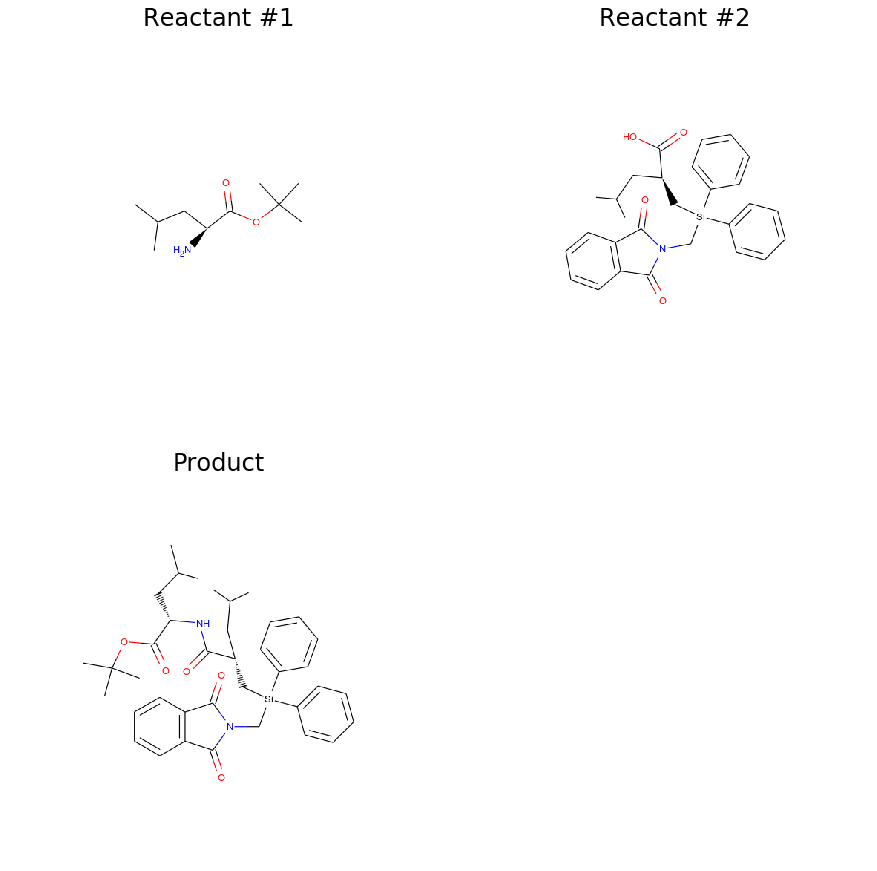

In [30]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(2, 2, 1)
ax.imshow(Draw.MolToImage(rct_1_mol, size=(500, 500)))
ax.set_title("Reactant #1", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(2, 2, 2)
ax.imshow(Draw.MolToImage(rct_2_mol, size=(500, 500)))
ax.set_title("Reactant #2", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(2, 2, 3)
ax.imshow(Draw.MolToImage(prd_mol, size=(500, 500)))
ax.set_title("Product", fontdict={"size": 24})
plt.axis('off')

### 2.4. Prettify
Let's fix several drawing parameteres to get prettier pictures.

In [31]:
from copy import deepcopy

In [32]:
default_options = deepcopy(Draw.DrawingOptions)
Draw.DrawingOptions.colorBonds = False
Draw.DrawingOptions.noCarbonSymbols = True
Draw.DrawingOptions.selectColor = (0, 1, 0)
Draw.DrawingOptions.dotsPerAngstrom = 200
Draw.DrawingOptions.atomLabelFontSize = 20
Draw.DrawingOptions.atomLabelMinFontSize = 20
Draw.DrawingOptions.bondLineWidth = 5
Draw.DrawingOptions.defaultColor = (0, 0, 0)
Draw.DrawingOptions.radicalSymbol = "."

(-0.5, 499.5, 499.5, -0.5)

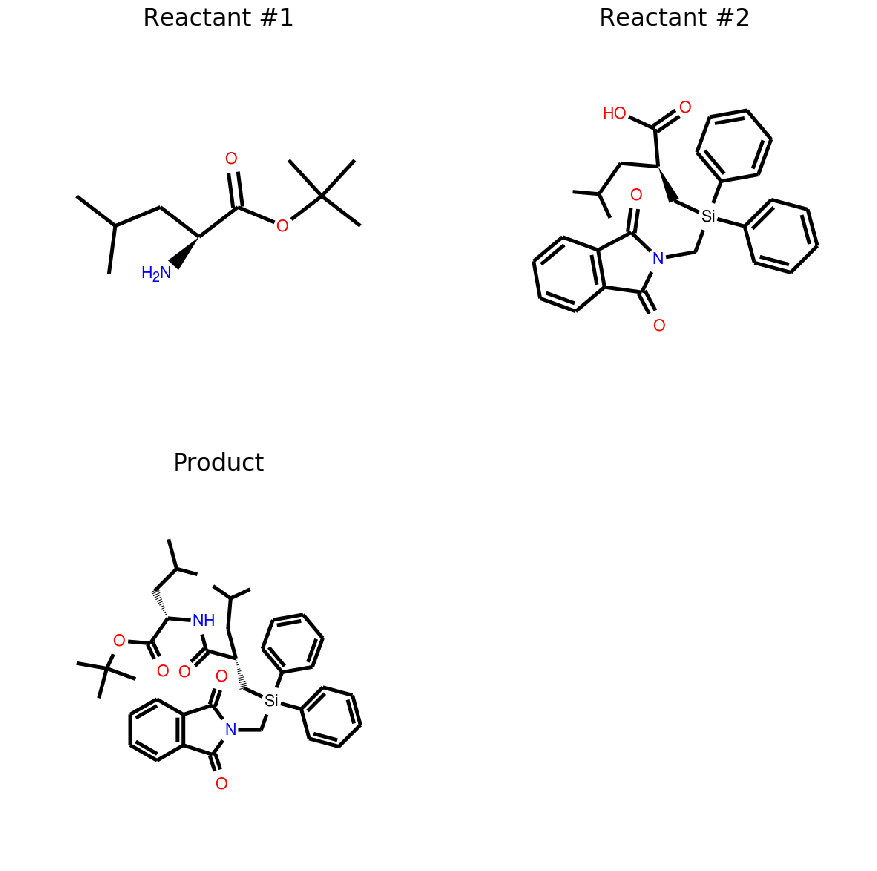

In [33]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(2, 2, 1)
ax.imshow(Draw.MolToImage(rct_1_mol, size=(500, 500)))
ax.set_title("Reactant #1", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(2, 2, 2)
ax.imshow(Draw.MolToImage(rct_2_mol, size=(500, 500)))
ax.set_title("Reactant #2", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(2, 2, 3)
ax.imshow(Draw.MolToImage(prd_mol, size=(500, 500)))
ax.set_title("Product", fontdict={"size": 24})
plt.axis('off')

# 3. Transformation
What exactly changed during this chemical reaction? This case is quite simple: there is $H_2N-R_1$ group in the first reactant and $R_2-COOH$ group in the second reactant. They interact, forming so-called amide bond. The result is $R_1-NH-C(=O)-R_2$

### 3.1. Fetch molecules from a reaction
Let's take a look to a couple of other reactions. To do so let's write helpers.

In [34]:
def get_reactants_and_products(reaction):
    rys = [c for c in reaction.getchildren() if c.tag == "RY"]
    assert len(rys) == 1
    ry = rys[0]
    reactants = [c.text for c in ry.getchildren() if c.tag == "RY.RCT"]
    products = [c.text for c in ry.getchildren() if c.tag == "RY.PRO"]
    reactant_mols = [Chem.MolFromMolBlock(r) for r in reactants]
    product_mols = [Chem.MolFromMolBlock(p) for p in products]
    return reactant_mols, product_mols

In [43]:
reaction = root.getchildren()[0].getchildren()[1]

In [36]:
reactants, products = get_reactants_and_products(reaction)
print(len(reactants), len(products))

2 1


In [37]:
rct_1_mol, rct_2_mol = reactants
prd_mol = products[0]

### 3.2. Compare this transformation with the previous

(-0.5, 499.5, 499.5, -0.5)

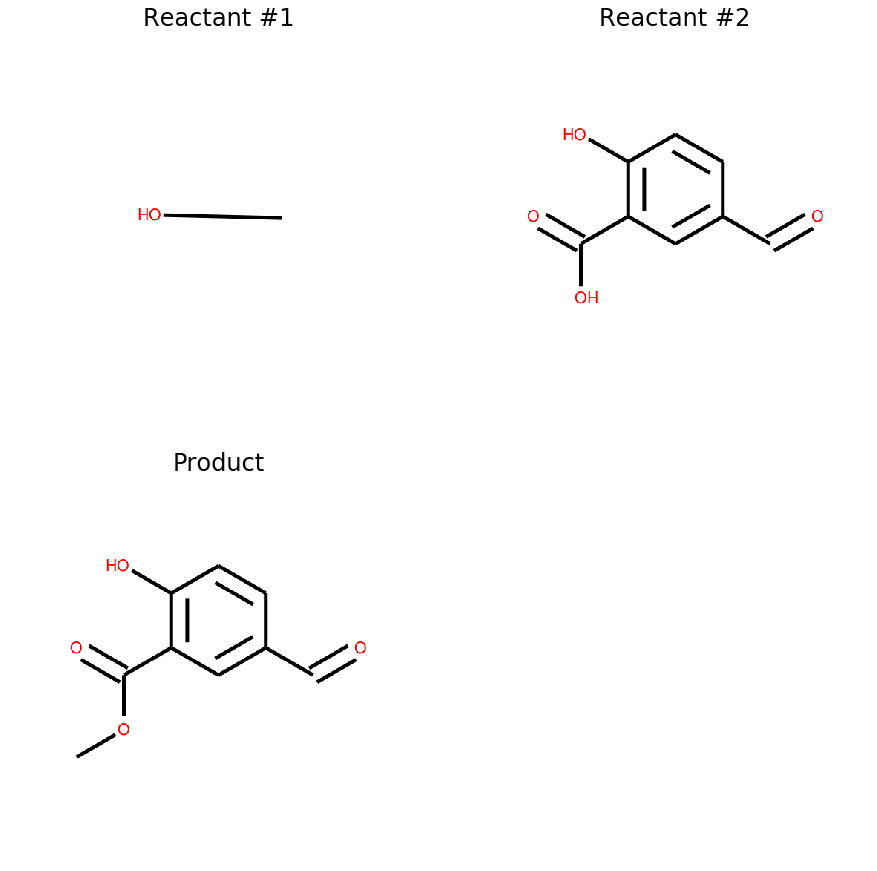

In [38]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(2, 2, 1)
ax.imshow(Draw.MolToImage(rct_1_mol, size=(500, 500)))
ax.set_title("Reactant #1", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(2, 2, 2)
ax.imshow(Draw.MolToImage(rct_2_mol, size=(500, 500)))
ax.set_title("Reactant #2", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(2, 2, 3)
ax.imshow(Draw.MolToImage(prd_mol, size=(500, 500)))
ax.set_title("Product", fontdict={"size": 24})
plt.axis('off')

Here we can see that $HOC$ and $HOOC-R$ converted into $COC(=O)-R$. But which oxygen disappeared and which one persisted?

### 3.3. Take a look to one more transformation

In [39]:
reaction = root.getchildren()[0].getchildren()[2]
reactants, products = get_reactants_and_products(reaction)
print(len(reactants), len(products))

1 1


In [40]:
rct_mol = reactants[0]
prd_mol = products[0]

(-0.5, 499.5, 499.5, -0.5)

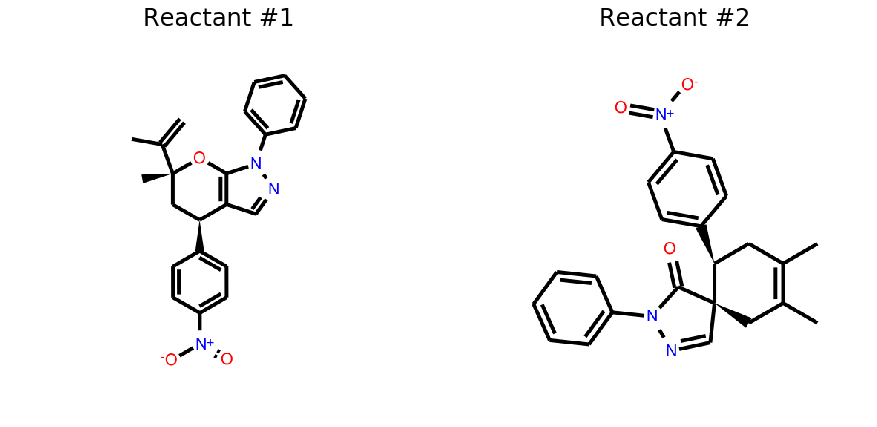

In [41]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(2, 2, 1)
ax.imshow(Draw.MolToImage(rct_mol, size=(500, 500)))
ax.set_title("Reactant #1", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(2, 2, 2)
ax.imshow(Draw.MolToImage(prd_mol, size=(500, 500)))
ax.set_title("Reactant #2", fontdict={"size": 24})
plt.axis('off')

What can we say about the reaction? If I were an experienced chemist, I wouldn't have problems with determining atoms which changed their properties and those that stayed intact. However, I am not and this case is not a simple one, is it?  
The problem is even worse if you are going to desribe it to computer. You need to find common fuzzy substructures between reactants and products. This fuzziness is hard to implement and in many cases will lead to incorrect reaction core. How could we address the problem?

# 4. Reaction core.

Reaction core is crucial for solving chemoinformatics tasks as it allows us to know which atoms were changed during reactions and which ones provided required environment. There are several possible ways to define reaction core, but all of them rely on notion of atom mapping.  
What is AM?  
Suppose one of the previous reactions looked like:

### 4.1. Trust me, I'm an engineer

In [378]:
rct_1_smarts = "[#8:1]-[#6:2]"
rct_2_smarts = "[#6:3]1(=[#6:4](-[#6:7]=[#6:11]-[#6:9](=[#6:5]-1)-[#6:12]=[#8:13])-[#8:8])-[#6:6](-[#8])=[#8:10]"
prd_smarts = "[#6:3]1(=[#6:4](-[#6:7]=[#6:11]-[#6:9](=[#6:5]-1)-[#6:12]=[#8:13])-[#8:8])-[#6:6](-[#8:1]-[#6:2])=[#8:10]"

In [379]:
rct_1_mol = Chem.MolFromSmarts(rct_1_smarts)
rct_2_mol = Chem.MolFromSmarts(rct_2_smarts)
prd_mol = Chem.MolFromSmarts(prd_smarts)

### 4.2. Atom classes.

(-0.5, 499.5, 499.5, -0.5)

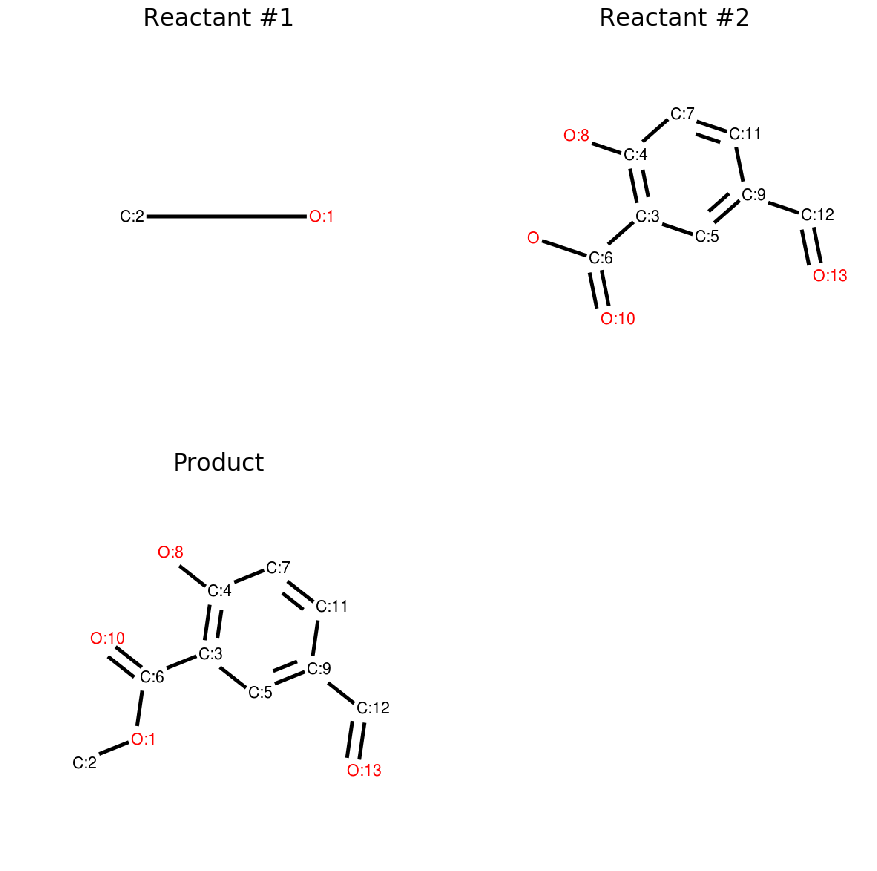

In [380]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(2, 2, 1)
ax.imshow(Draw.MolToImage(rct_1_mol, size=(500, 500)))
ax.set_title("Reactant #1", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(2, 2, 2)
ax.imshow(Draw.MolToImage(rct_2_mol, size=(500, 500)))
ax.set_title("Reactant #2", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(2, 2, 3)
ax.imshow(Draw.MolToImage(prd_mol, size=(500, 500)))
ax.set_title("Product", fontdict={"size": 24})
plt.axis('off')

What changed? Now every atom has its own number and these numbers show the correspondence between reactants and products. It is very useful, because now we know exactly that oxygen atom from the first reactant persisted and the one from the second reactant disappeared.

Knowing atom mapping between reactants and products is enough for finding reaction core. There are three popular ways of defining reaction core.

### 4.3. Highligh changed atoms

(-0.5, 499.5, 499.5, -0.5)

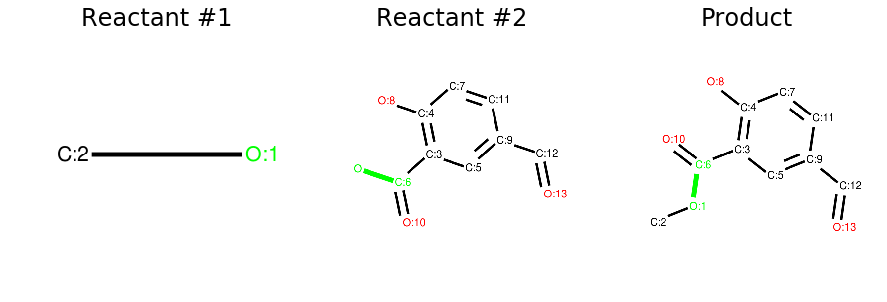

In [381]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(1, 3, 1)
ax.imshow(Draw.MolToImage(rct_1_mol, highlightAtoms=[0], size=(250, 250)))
ax.set_title("Reactant #1", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(1, 3, 2)
ax.imshow(Draw.MolToImage(rct_2_mol, highlightAtoms=[9, 10], size=(500, 500)))
ax.set_title("Reactant #2", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(1, 3, 3)
ax.imshow(Draw.MolToImage(prd_mol, highlightAtoms=[9, 10], size=(500, 500)))
ax.set_title("Product", fontdict={"size": 24})
plt.axis('off')

The first and the simplest way: only atoms that changed during the reaction are the reaction core.  
This is not a good way to go, because nearest neighborhood in most cases dramatically impacts ability of compounds to react.  
For instance, __C:6__ atom is attached to __O:10__ by a double bond. This is known as carboxylic acid and it reacts with an alcohol under room temperature, but if __C:6__ was not attached to an oxygen, the second reactant would also be an alcohol. Two alcohols react under much more severe conditions.

### 4.3. Expand reaction core

(-0.5, 499.5, 499.5, -0.5)

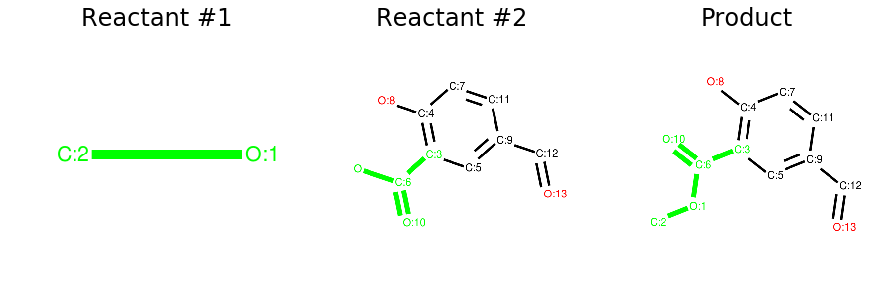

In [382]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(1, 3, 1)
ax.imshow(Draw.MolToImage(rct_1_mol, highlightAtoms=[0, 1], size=(250, 250)))
ax.set_title("Reactant #1", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(1, 3, 2)
ax.imshow(Draw.MolToImage(rct_2_mol, highlightAtoms=[0, 9, 10, 11], size=(500, 500)))
ax.set_title("Reactant #2", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(1, 3, 3)
ax.imshow(Draw.MolToImage(prd_mol, highlightAtoms=[0, 9, 10, 11, 12], size=(500, 500)))
ax.set_title("Product", fontdict={"size": 24})
plt.axis('off')

The second way: expand the previous reaction core by one bond in any possible direction: __[C:6]__ is taken, let's also take __[C:3]__ and __[O:10]__. This approach is preferable and is used in most cases.

### 4.4. Determine reaction cores automatically

First of all, let's introduce chemical reaction notion. RDKit has its own implementation, we know everything about reactants and products, that's enough do build a reaction:

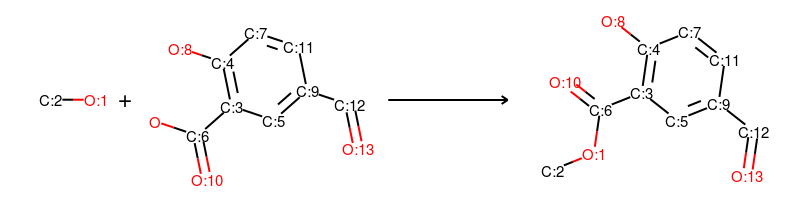

In [383]:
reaction = AllChem.ReactionFromSmarts(">>")
reaction.AddReactantTemplate(rct_1_mol)
reaction.AddReactantTemplate(rct_2_mol)
reaction.AddProductTemplate(prd_mol)
Draw.ReactionToImage(reaction)

Trust me, the following functions just determine reaction core.

In [384]:
from itertools import chain

In [385]:
def finish_mapping(mol, cur_i):
    def is_h(a):
        return a.GetSymbol() == "H"

    def non_mapped(a):
        return a.GetAtomMapNum() == 0

    if any([a.GetAtomMapNum() != 0 for a in mol.GetAtoms()]):
        for non_mapped_atom in [a for a in mol.GetAtoms() if not is_h(a) and non_mapped(a)]:
            non_mapped_atom.SetAtomMapNum(cur_i)
            cur_i += 1

        for atom in mol.GetAtoms():
            for hydrogen_i, hydrogen in enumerate([n for n in atom.GetNeighbors() if is_h(n)]):
                hydrogen.SetAtomMapNum(atom.GetAtomMapNum() + 1000 * (hydrogen_i + 1))

    return cur_i

In [386]:
def get_product_atom_by_reagent(rea, atom):
    for product in rea.GetProducts():
        for p_atom in product.GetAtoms():
            if p_atom.GetAtomMapNum() == atom.GetAtomMapNum():
                return p_atom, product
            
def get_reagent_atom_by_product(rea, atom):
    for reactant in rea.GetReactants():
        for r_atom in reactant.GetAtoms():
            if r_atom.GetAtomMapNum() == atom.GetAtomMapNum():
                return r_atom, reactant

In [387]:
def get_ends(bond):
    return sorted([bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()])


def get_atoms_changed(rea):
    result = []

    for reactant_i, reactant in enumerate(rea.GetReactants()):
        reactant_result = []

        if reactant.GetAtoms()[0].GetAtomMapNum() == 0:
            result.append([])
            continue

        for atom in reactant.GetAtoms():
            p = get_product_atom_by_reagent(rea, atom)

            if p is None:
                reactant_result.append(atom.GetIdx())
                continue

            p_atom, product = p

            a_neighs = ([((n.GetSymbol(), n.GetAtomMapNum()),
                          reactant.GetBondBetweenAtoms(atom.GetIdx(), n.GetIdx()).GetBondType())
                         for n in atom.GetNeighbors()
                         ])

            p_neighs = ([((n.GetSymbol(), n.GetAtomMapNum()),
                          product.GetBondBetweenAtoms(p_atom.GetIdx(), n.GetIdx()).GetBondType())
                         for n in p_atom.GetNeighbors()
                         ])

            if len(a_neighs) != len(p_neighs) or \
                    any([a != b for a, b in zip(sorted(a_neighs), sorted(p_neighs))]):
                reactant_result.append(atom.GetIdx())

        result.append(reactant_result)
    return result

In [568]:
def get_reaction_core(rea):
    core_reactants = []
    
    r_atoms = copy(get_atoms_changed(rea))

    for seq, mol in zip(r_atoms, rea.GetReactants()):
        reaction_core_atoms = set()
        reaction_core_bonds = set()

        # The molecule has no atoms mapped to the product
        if all([get_product_atom_by_reagent(rea, atom) is None for atom in mol.GetAtoms()]):
#             print(seq, 1)
            continue

        # No atoms changed in the molecule
        if len(seq) == 0:
#             print(2)
            continue

        for el in seq:
            cur_atom = mol.GetAtoms()[el]
            reaction_core_atoms.add(cur_atom.GetIdx())

            # Take hydrogens only if they are changed in reaction
            # Do not take them as neighbors
            if cur_atom.GetSymbol() == "H":
                cur_nei = cur_atom.GetNeighbors()[0]
                for bond_i, bond in enumerate(mol.GetBonds()):
                    if get_ends(bond) == sorted([cur_atom.GetIdx(), cur_nei.GetIdx()]):
                        reaction_core_bonds.add(bond_i)
                continue

            primary_neighs = [n for n in cur_atom.GetNeighbors() if n.GetSymbol() != "H"]
            primary_bonds = [mol.GetBondBetweenAtoms(cur_atom.GetIdx(),
                                                     nei.GetIdx())
                             for nei in primary_neighs
                             ]

            for n in primary_neighs:
                reaction_core_atoms.add(n.GetIdx())

            for b in primary_bonds:
                for new_bb_i, bb in enumerate(mol.GetBonds()):
                    if get_ends(bb) == get_ends(b):
                        reaction_core_bonds.add(new_bb_i)

        emol = Chem.EditableMol(mol)

        bonds_to_remove = [i for i in range(len(mol.GetBonds())) if i not in reaction_core_bonds]
        atoms_to_remove = [i for i in range(len(mol.GetAtoms())) if i not in reaction_core_atoms]

        for bond in bonds_to_remove[::-1]:
            emol.RemoveBond(*get_ends(mol.GetBonds()[bond]))
        for atom in atoms_to_remove[::-1]:
            emol.RemoveAtom(atom)

        core_reactants.append(emol.GetMol())

    core_products = []

    def process_bond(bd):
        return bd.GetBeginAtom().GetAtomMapNum(), bd.GetEndAtom().GetAtomMapNum()

    for product in rea.GetProducts():
        r_atom_classes = list(chain(*[[r.GetAtoms()[a].GetAtomMapNum() for a in l]
                                      for l, r in zip(r_atoms, rea.GetReactants())]))

        core_atom_classes = list(chain(*[[a.GetAtomMapNum() for a in m.GetAtoms()] for m in core_reactants]))

        orphan_atom_classes = [a.GetAtomMapNum()
                               for a in product.GetAtoms()
                               if get_reagent_atom_by_product(rea, a) is None]
        core_classes = core_atom_classes + orphan_atom_classes

        core_bonds = list(chain(*[[process_bond(b) for b in m.GetBonds()] for m in core_reactants]))
        am_bonds = [process_bond(b) for b in product.GetBonds()]
        core_product_bonds = [i for i, b in enumerate(am_bonds)
                              if (b in core_bonds or
                                  b[0] in orphan_atom_classes or
                                  b[1] in orphan_atom_classes or
                                  b[0] in r_atom_classes or
                                  b[1] in r_atom_classes
                                  )
                              ]

        atoms_to_remove = [i for i, a in enumerate(product.GetAtoms()) if a.GetAtomMapNum() not in core_classes]
        bonds_to_remove = [i for i, b in enumerate(product.GetBonds()) if i not in core_product_bonds]

        emol = Chem.EditableMol(product)

        for bond in bonds_to_remove[::-1]:
            emol.RemoveBond(*get_ends(product.GetBonds()[bond]))
        for atom in atoms_to_remove[::-1]:
            emol.RemoveAtom(atom)

        core_products.append(emol.GetMol())

    return core_reactants, core_products

In [396]:
from copy import copy

In [397]:
rct_core, prd_core = get_reaction_core(reaction)

(-0.5, 499.5, 499.5, -0.5)

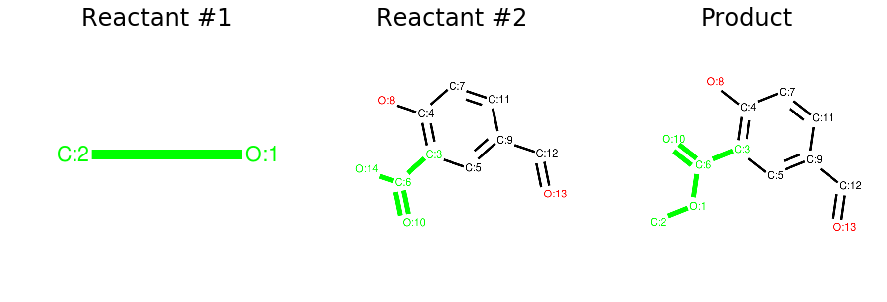

In [398]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(1, 3, 1)
ax.imshow(Draw.MolToImage(rct_1_mol, highlightAtoms=[0, 1], size=(250, 250)))
ax.set_title("Reactant #1", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(1, 3, 2)
ax.imshow(Draw.MolToImage(rct_2_mol, highlightAtoms=[0, 9, 10, 11], size=(500, 500)))
ax.set_title("Reactant #2", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(1, 3, 3)
ax.imshow(Draw.MolToImage(prd_mol, highlightAtoms=[0, 9, 10, 11, 12], size=(500, 500)))
ax.set_title("Product", fontdict={"size": 24})
plt.axis('off')

### 4.5. Plot a reaction core

(-0.5, 299.5, 299.5, -0.5)

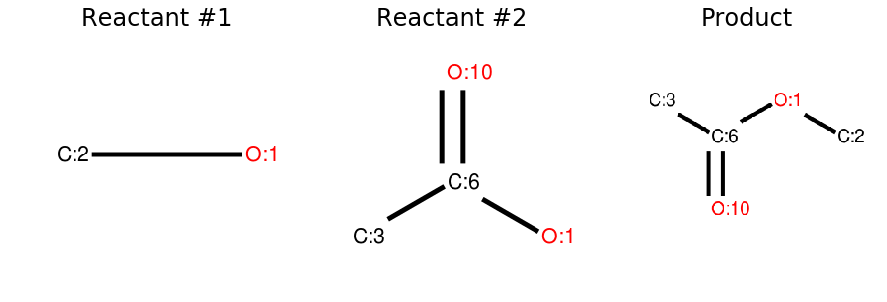

In [399]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(1, 3, 1)
ax.imshow(Draw.MolToImage(rct_core[0], size=(250, 250)))
ax.set_title("Reactant #1", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(1, 3, 2)
ax.imshow(Draw.MolToImage(rct_core[1], size=(250, 250)))
ax.set_title("Reactant #2", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(1, 3, 3)
ax.imshow(Draw.MolToImage(prd_core[0], size=(300, 300)))
ax.set_title("Product", fontdict={"size": 24})
plt.axis('off')

Looks okay, assume we have the same data for the third reaction.

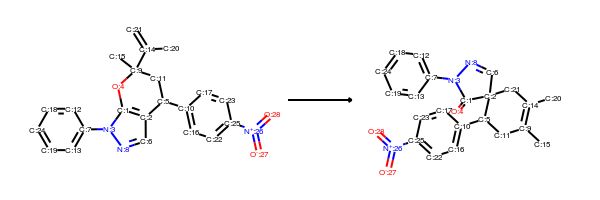

In [400]:
rct_smarts = "[#6:1]12=[#6:2](-[#6:5](-[#6:10]3=[#6:16]-[#6:22]=[#6:25](-[#6:23]=[#6:17]-3)-[#7:26](=[#8:27])=[#8:28])-[#6:11]-[#6:9](-[#8:4]-1)(-[#6:14](-[#6:20])=[#6:21])-[#6:15])-[#6:6]=[#7:8]-[#7:3]-2-[#6:7]1-[#6:12]=[#6:18]-[#6:24]=[#6:19]-[#6:13]=1"
prd_smarts = "[#6:2]12(-[#6:5](-[#6:10]3-[#6:17]=[#6:23]-[#6:25](=[#6:22]-[#6:16]=3)-[#7:26](=[#8:27])=[#8:28])-[#6:11]-[#6:9](=[#6:14](-[#6:21]-1)-[#6:20])-[#6:15])-[#6:1](-[#7:3](-[#7:8]=[#6:6]-2)-[#6:7]1=[#6:12]-[#6:18]=[#6:24]-[#6:19]=[#6:13]-1)=[#8:4]"
    
rct_mol = Chem.MolFromSmarts(rct_smarts)
prd_mol = Chem.MolFromSmarts(prd_smarts)
    
reaction = AllChem.ReactionFromSmarts(">>")
reaction.AddReactantTemplate(rct_mol)
reaction.AddProductTemplate(prd_mol)
Draw.ReactionToImage(reaction)

(-0.5, 999.5, 999.5, -0.5)

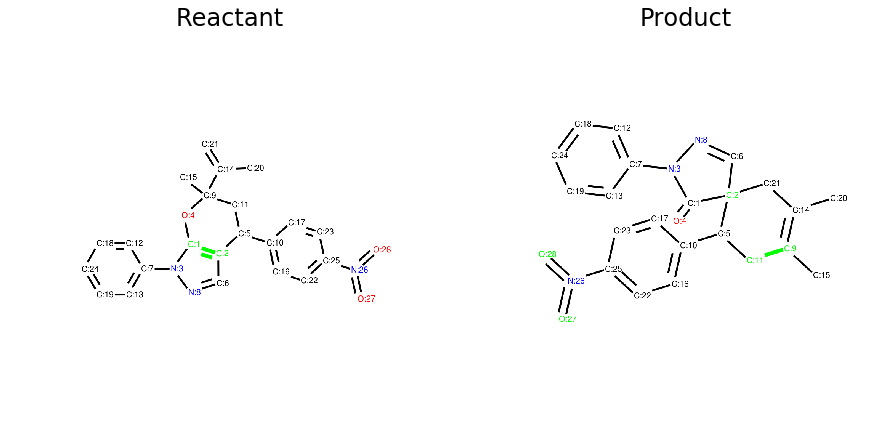

In [401]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(1, 2, 1)
ax.imshow(Draw.MolToImage(rct_mol, size=(1000, 1000)))
ax.set_title("Reactant", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(1, 2, 2)
ax.imshow(Draw.MolToImage(prd_mol, size=(1000, 1000)))
ax.set_title("Product", fontdict={"size": 24})
plt.axis('off')

In [402]:
rct_core, prd_core = get_reaction_core(reaction)

(-0.5, 749.5, 749.5, -0.5)

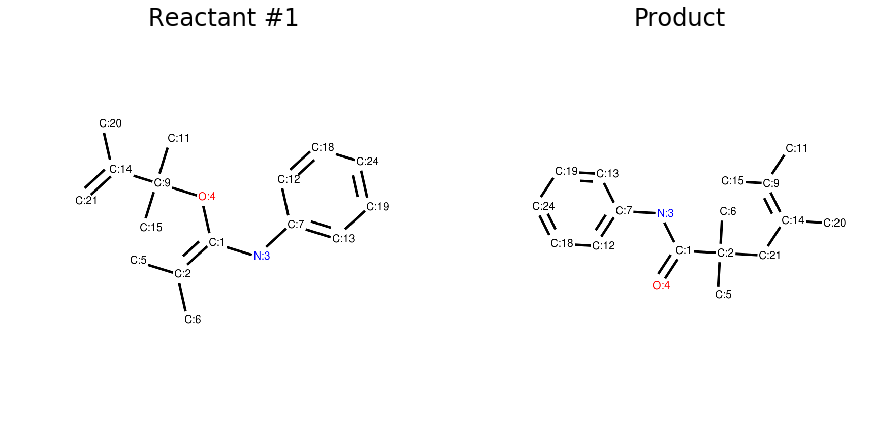

In [403]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(1, 2, 1)
ax.imshow(Draw.MolToImage(rct_core[0], size=(750, 750)))
ax.set_title("Reactant #1", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(1, 2, 2)
ax.imshow(Draw.MolToImage(prd_core[0], size=(750, 750)))
ax.set_title("Product", fontdict={"size": 24})
plt.axis('off')

Looks great, now we know what exactly is going on. However, where should we get these pretty numbers?

# 5. Get Atom Mapping

Let's go back to the start. We have seen soooo many different fields in the XML file. Let's try to find something useful.

In [404]:
rx, rxd, ry = root.getchildren()[0].getchildren()[10].getchildren()

In [405]:
rx.getchildren()

[<Element RX.ID at 0x7f830c7293c8>,
 <Element RX01 at 0x7f830c729bc8>,
 <Element RX01 at 0x7f830c729b88>,
 <Element RX02 at 0x7f830c729d48>,
 <Element RX.BLB at 0x7f830c747188>,
 <Element RX.BLB at 0x7f830c7471c8>,
 <Element RX.BLB at 0x7f830c747208>,
 <Element RX.BLC at 0x7f830c747248>,
 <Element RX.BLC at 0x7f830c747288>,
 <Element RX.BLC at 0x7f830c7472c8>,
 <Element RX.NVAR at 0x7f830c747308>,
 <Element RX03 at 0x7f830c747348>,
 <Element RX04 at 0x7f830c747388>,
 <Element RX.RXNFILE at 0x7f830c7473c8>,
 <Element RX.REG at 0x7f830c747408>,
 <Element RX.RANK at 0x7f830c747448>,
 <Element RX.SKW at 0x7f830c747488>,
 <Element RX.RTYP at 0x7f830c7474c8>,
 <Element RX.RTYP at 0x7f830c747508>,
 <Element RX.RAVAIL at 0x7f830c747548>,
 <Element RX.PAVAIL at 0x7f830c747588>,
 <Element RX.MAXPUB at 0x7f830c7475c8>,
 <Element RX.NUMREF at 0x7f830c747608>,
 <Element RX.MAXPMW at 0x7f830c747648>,
 <Element RX.ED at 0x7f830c747688>,
 <Element RX.UPD at 0x7f830c7476c8>]

### 5.1. RXNFILE

RXNFILE is potentially interesting, because it describes reactions.  
Let's take a look to an example rxn file.

In [248]:
!cat ../data/example.rxn

$RXN



  2  1
$MOL

  R>Mv4.0000000000002D 1   1.00000     0.00000     0

 12 12  0  0  0  0  0  0  0  0999 V2000
    3.5001    2.2320    0.0000 C   0  0  0  0  0  0  0  0  0  1  0  0
    2.5000    2.2320    0.0000 C   0  0  0  0  0  0  0  0  0  2  0  0
    4.0001    3.0980    0.0000 C   0  0  0  0  0  0  0  0  0  3  0  0
    4.0001    1.3660    0.0000 C   0  0  0  0  0  0  0  0  0  4  0  0
    2.0000    1.3660    0.0000 C   0  0  0  0  0  0  0  0  0  5  0  0
    2.0000    3.0980    0.0000 Br  0  0  0  0  0  0  0  0  0  6  0  0
    5.0001    3.0980    0.0000 C   0  0  0  0  0  0  0  0  0  7  0  0
    5.0001    1.3660    0.0000 C   0  0  0  0  0  0  0  0  0  8  0  0
    1.0000    1.3660    0.0000 C   0  0  0  0  0  0  0  0  0  9  0  0
    5.5001    2.2320    0.0000 C   0  0  0  0  0  0  0  0  0 10  0  0
    0.5000    0.5000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.5000    2.2320    0.0000 O   0  0  0  0  0  0  0  0  0 11  0  0
  1  2  1  0  0  0  0
  1  3  2  0  0  0  0
 

We can find here information about three molecules: two of them are reactants and the last one is product. The first block of the molecule description is about atoms: symbols (S, N, C, O, ...), coordinates and auxiliary info. The second block is about chemical bonds. We are interested in the first four columns: bond_index, first_atom, second_atom, bond_order.

Pay attention to the 14th column: these numbers probably represent atom mapping we are trying to find! So let's build an example reaction and see whether that is the case.

(-0.5, 1199.5, 1199.5, -0.5)

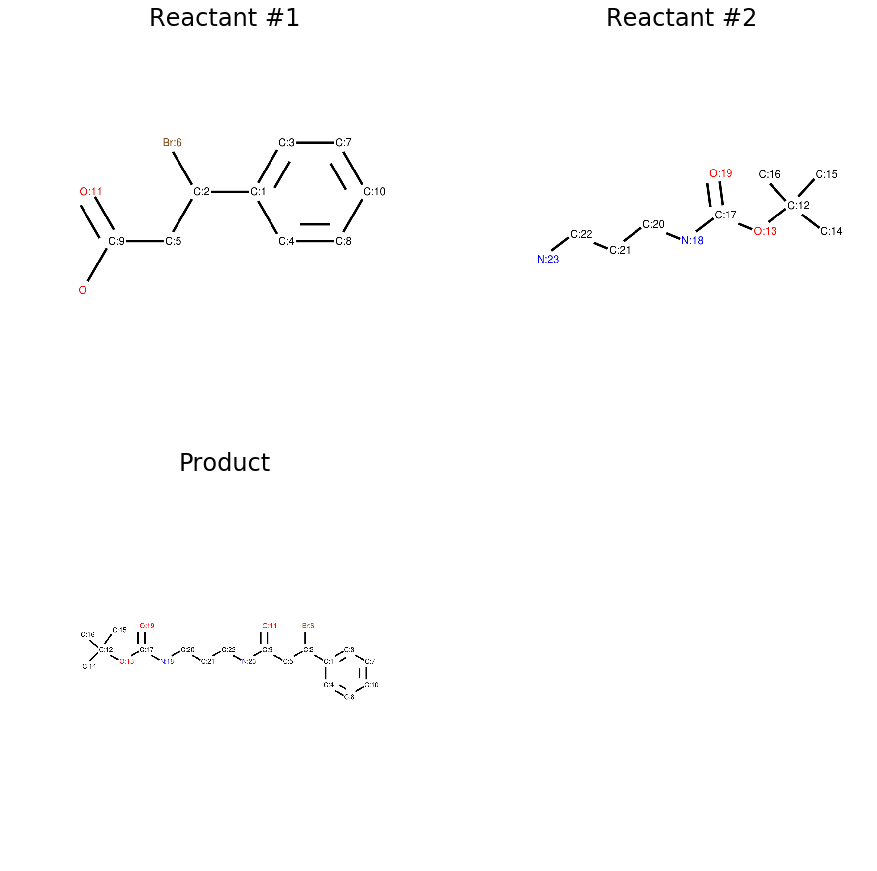

In [406]:
reaction = AllChem.ReactionFromRxnFile("../data/example.rxn")
rct_1_mol, rct_2_mol = reaction.GetReactants()
prd_mol = reaction.GetProducts()[0]

fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(2, 2, 1)
ax.imshow(Draw.MolToImage(rct_1_mol, size=(750, 750)))
ax.set_title("Reactant #1", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(2, 2, 2)
ax.imshow(Draw.MolToImage(rct_2_mol, size=(750, 750)))
ax.set_title("Reactant #2", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(2, 2, 3)
ax.imshow(Draw.MolToImage(prd_mol, size=(1200, 1200)))
ax.set_title("Product", fontdict={"size": 24})
plt.axis('off')

### 5.2. RXNFILE CTF

So, these number really mean atom classes and we can use them so as to get reaction cores! Let's just take RXNFILE from XML!

In [407]:
rxnfile = [c for c in rx.getchildren() if c.tag == "RX.RXNFILE"][0]
print(rxnfile.text)

eJzdWctuJDcMvPsr+rDXbYikXrwE8GYmGyBjG/Aai+xp/yGHfH+oR48ltTJu2jllYBhtQiqTFEVW9Xx6/vPxTj7LgssCd58eni7pj+dfHv62q2k+eFpgkSXFuKSPaZ/TLl6WKI/5B7aH+sPMy3eU5XdLgQHA8uSMxVe45ddl2Nn/VNwBxazeAxxHwSkKruSsPY5CHUq0QNOIvvx1E8U2KLgay1T3umCO++IalLpj9vQGiu9QwFDeS5Ih7xqUp9sopssLW08lNnZRgRJ6XyKYaXZ/P+oLlBrfW2lqtfk3DFbeWzEnf0TAnMzRSjmsiTVea7JaH5bl28uPpVy65XT/ki33l2VzQG5rspxesuXhdPny9ee3l/Pz+ennH+cfS/f5rSw9lc05d3y9f8aWfJ7u0+/7y2VbJHHlfeey7zn98Xz+ukBAAGvTn+fH08d6BsFC9G+H1veMKPUT6u200ZumBt6o6thUUpRKcrZEDqRB4QaFV4dUUQgVnQdMjxJ8QvlsVjJ83Bdou2BcEbmiIGCL8ngbBTsU8pgjwhWQ4ThK2wWD5MXU/hW5y+7t2w5NFwQ5X0ZXsiuXXZEX16E4vHYtIgVK2wWD1BrX/uXJKU667V9+9WArCkjBHEeJvS9cZgyt3iqmJrS169ZQJ1WKqDvp22eEZogI67yTh+MnjdChOEs1ImY8HhG2tWtX9qF2M2bFbUTqfCEfqeLFoPClneCSXc81IrJe4Us7waWPAm+cpD+jN1B854tcHixPRF1Et+80hs6XiKXWpOpUZxQ7FG8j1qfICpS2dmkNZovIkOIGkGlQhIlggOILRQ0KdL64mhe/Ggx0HKVnnxy4+hLIKHxpaxfTJIHiCwVS+GI7X9D46ouJ5ni9kOtQoiEoZxRQ40vPPtGViWilin3ry+3+QqHzhWLpB8JhYzje6+i1dt/FG0frYYaImSHiYC0McVxrNz7aWX0mGaM1ztZCoRIT6z5iWQj7iJPV7vyV7bCPWLbD

🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔

In [408]:
base64.decodebytes(rxnfile.text.encode("utf-8"))

b'x\x9c\xddY\xcbn$7\x0c\xbc\xfb+\xfa\xb0\xd7m\x88\xa4^\xbc\x04\xf0f&\x1b c\x1b\xf0\x1a\x8b\xeci\xff!\x87|\x7f\xa8G\x8f%\xb52n\xda9e`\x18mB*\x93\x14EV\xf5|z\xfe\xf3\xf1N>\xcb\x82\xcb\x02w\x9f\x1e\x9e.\xe9\x8f\xe7_\x1e\xfe\xb6\xabi>xZ`\x91%\xc5\xb8\xa4\x8fi\x9f\xd3.^\x96(\x8f\xf9\x07\xb6\x87\xfa\xc3\xcc\xcbw\x94\xe5wK\x81\x01\xc0\xf2\xe4\x8c\xc5W\xb8\xe5\xd7e\xd8\xd9\xffT\xdc\x01\xc5\xac\xde\x03\x1cG\xc1)\n\xae\xe4\xac=\x8eB\x1dJ\xb4@\xd3\x88\xbe\xfcu\x13\xc56(\xb8\x1a\xcbT\xf7\xba`\x8e\xfb\xe2\x1a\x94\xbac\xf6\xf4\x06\x8a\xefP\xc0P\xdeK\x92!\xef\x1a\x94\xa7\xdb(\xa6\xcb\x0b[O%6vQ\x81\x12z_"\x98iv\x7f?\xea\x0b\x94\x1a\xdf[ij\xb5\xf97\x0cV\xde[1\'\x7fD\xc0\x9c\xcc\xd1J9\xac\x895^k\xb2Z\x1f\x96\xe5\xdb\xcb\x8f\xa5\\\xba\xe5t\xff\x92-\xf7\x97es@nk\xb2\x9c^\xb2\xe5\xe1t\xf9\xf2\xf5\xe7\xb7\x97\xf3\xf3\xf9\xe9\xe7\x1f\xe7\x1fK\xf7\xf9\xad,=\x95\xcd9w|\xbd\x7f\xc6\x96|\x9e\xee\xd3\xef\xfb\xcbe[$q\xe5}\xe7\xb2\xef9\xfd\xf1|\xfe\xba@@\x00k\xd3\x9f\xe7\xc7\xd3\xc7z\x06\xc1B\xf4o\x87\xd6\xf7\x8c(\

🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔

### 5.3. RXNFILE Read

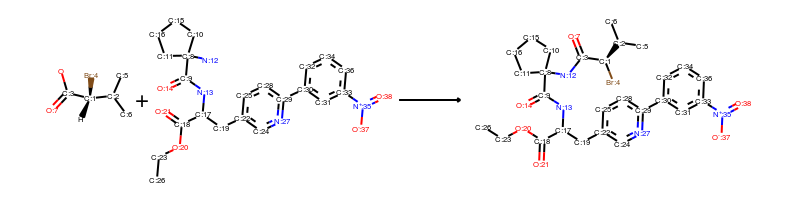

In [409]:
import base64
import codecs
decoded = codecs.decode(base64.decodebytes(rxnfile.text.encode("utf-8")), "zlib").decode("utf-8")
rea = AllChem.ReactionFromRxnBlock(decoded)
smirks = AllChem.ReactionToSmarts(rea)
Draw.ReactionToImage(rea)

Don't ask me why...

# 6. Reaction core grouping.

### 6.1. Wrap preprocessing

Let's start real preprocessing: take a file we have and try to determine reaction cores for all the reactions inside.

In [410]:
def read_rxnfile(rxnfile):
    decoded = codecs.decode(base64.decodebytes(rxnfile.text.encode("utf-8")), "zlib").decode("utf-8")
    rea = AllChem.ReactionFromRxnBlock(decoded)
    return rea

In [411]:
def process_reaction(xml_reaction):
    children = [c for c in xml_reaction.getchildren()]
    rx = [c for c in children if c.tag == "RX"]
    rxds = [c for c in children if c.tag == "RXD"]
    ry = [c for c in children if c.tag == "RY"]
    
    if len(rx) != 1 or len(ry) != 1:
        return None
    
    rx = rx[0]
    ry = ry[0]
    
    rxnfile = [c for c in rx.getchildren() if c.tag == "RX.RXNFILE"]
    if len(rxnfile) != 1:
        return None
    
    rxnfile = rxnfile[0]
    reaction = read_rxnfile(rxnfile)
    
    return reaction

In [525]:
%%time

reactions_xml = root.getchildren()[0].getchildren()
reactions_rdkit = [process_reaction(r) for r in reactions_xml]
reactions_rdkit = [r for r in reactions_rdkit if r is not None]
reaction_cores = [get_reaction_core(r) for r in reactions_rdkit]
reactions, cores = zip(*[(r, c) for r, c in zip(reactions_rdkit, reaction_cores) if c is not None])

CPU times: user 43.9 s, sys: 397 ms, total: 44.3 s
Wall time: 44.3 s


### 6.2. Check for the correctness

In [536]:
IDX = 0

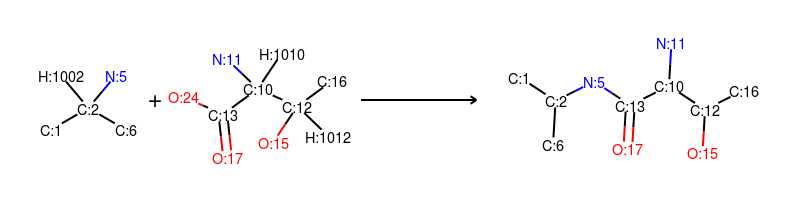

In [567]:
rct_0, prd_0 = cores[IDX]
rct_smarts = ".".join([Chem.MolToSmarts(m) for m in rct_0])
prd_smarts = ".".join([Chem.MolToSmarts(m) for m in prd_0])
smirks_0 = rct_smarts + ">>" + prd_smarts
rea_0 = AllChem.ReactionFromSmarts(smirks_0)
IDX += 1
Draw.ReactionToImage(rea_0)

There are lots of problems with reaction cores, e.g. excess/missing hydrogens, incorrect work with aromaticity, converting reaction core to string and missing atom classes.

### 6.3. Fix common problems

In [622]:
def preprocess_reaction(rea):
    agents = list(rea.GetReactants()) + list(rea.GetProducts())
    atoms = [a for a in chain(*[a.GetAtoms() for a in agents])]
    atom_classes = [a.GetAtomMapNum() for a in atoms]
    next_i = max(atom_classes) + 1
        
    rcts = [r for r in rea.GetReactants()]
    prds = [p for p in rea.GetProducts()]
    
    try:
        _ = [Chem.SanitizeMol(m, sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL) for m in rcts]
        _ = [Chem.SanitizeMol(m, sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL) for m in prds]

        new_rcts = [AllChem.AddHs(r) for r in rcts]
        new_prds = [AllChem.AddHs(p) for p in prds]
    except:
        return None
    
    for r in new_rcts:
        next_i = finish_mapping(r, next_i)
        
    for p in new_prds:
        next_i = finish_mapping(p, next_i)
    
    new_rct_smiles = [Chem.MolToSmiles(m, allBondsExplicit=True) for m in new_rcts]
    new_prd_smiles = [Chem.MolToSmiles(m, allBondsExplicit=True) for m in new_prds]
    
    reaction_smiles = ".".join(new_rct_smiles) + ">>" + ".".join(new_prd_smiles)
    new_reaction = AllChem.ReactionFromSmarts(reaction_smiles, useSmiles=True)
    return new_reaction

In [623]:
%%time

reactions_xml = root.getchildren()[0].getchildren()
reactions_rdkit = [process_reaction(r) for r in reactions_xml]
reactions_rdkit = [r for r in reactions_rdkit if r is not None]
proc_reactions_rdkit = [preprocess_reaction(r) for r in reactions_rdkit]
proc_reactions_rdkit = [r for r in proc_reactions_rdkit if r is not None]
reaction_cores = [get_reaction_core(r) for r in proc_reactions_rdkit]
reactions, cores = zip(*[(r, c) for r, c in zip(proc_reactions_rdkit, reaction_cores) if c is not None])

CPU times: user 1min 27s, sys: 466 ms, total: 1min 28s
Wall time: 1min 28s


### 6.4. Check for the correctness again

In [624]:
IDX = 0

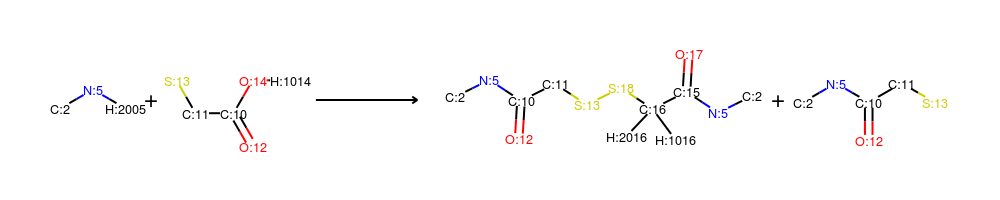

In [750]:
rct_0, prd_0 = cores[IDX]
rct_smarts = ".".join([Chem.MolToSmarts(m) for m in rct_0])
prd_smarts = ".".join([Chem.MolToSmarts(m) for m in prd_0])
smirks_0 = rct_smarts + ">>" + prd_smarts
rea_0 = AllChem.ReactionFromSmarts(smirks_0)
IDX += 1
Draw.ReactionToImage(rea_0)

### 6.5. Reaction core string

In [751]:
core_strings = []

for core in cores:
    rct, prd = core
    rct_smiles = ".".join([Chem.MolToSmiles(m) for m in rct])
    prd_smiles = ".".join([Chem.MolToSmiles(m) for m in prd])
    
    core_strings.append(rct_smiles + ">>" + prd_smiles)

In [756]:
core_strings_unmapped = []

for core in cores:
    rct, prd = core
    for m in rct + prd:
        for a in m.GetAtoms():
            a.SetAtomMapNum(0)
            
    rct_smiles = ".".join(sorted([Chem.MolToSmiles(m) for m in rct]))
    prd_smiles = ".".join(sorted([Chem.MolToSmiles(m) for m in prd]))
    
    core_strings_unmapped.append(rct_smiles + ">>" + prd_smiles)

In [757]:
core_strings[0], core_strings_unmapped[0]

('[C:7][N:10][H:2010].[C:24][C:31](=[O:39])[O:47][H:1047]>>[C:7][N:10][C:31]([C:24])=[O:39]',
 '[H]NC.[H]OC(C)=O>>CNC(C)=O')

In [758]:
import pandas as pd

In [763]:
cores_df = pd.DataFrame(list(zip(core_strings, core_strings_unmapped)))
cores_df.columns = ["core", "core_unmapped"]
cores_df.loc[:, "reaction"] = [AllChem.ReactionToSmiles(r) for r in reactions]

In [765]:
cores_df.core_unmapped.value_counts()

[H]NC.[H]OC(C)=O>>CNC(C)=O                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    2300
[H]C1([H])C(=O)N(OC(C)=O)C(=O)C1([H])[H].[H]NC>>CNC(C)=O                                                                                                                                             

### 6.6. Possible problems with reactions

Supppose we have done the previous analysis for 100 XML files and got ~170k reactions. What should we do next?

In [865]:
reactions_df = pd.read_csv("../data/reactions.tsv", sep="\t")
reactions_df.head(10)

,SMIRKS,core_SMIRKS,reaction_id
0,[H]-c1:c(-[H]):c(-[H]):c(-C(-[H])(-[H])-[O:22]...,[H]-c1:c(-[H]):c(-[H]):c(:c(-[H]):c:1-[H])-C(-...,10359761
1,[H]-c1:c(-[H]):c(-[H]):c(-C(-[H])(-[H])-[O:22]...,[H]-c1:c(-[H]):c(-[H]):c(:c(-[H]):c:1-[H])-C(-...,10359761
2,[H]-[c:6]1:[c:2](-[C:1](-[C:3](-[Cl:7])(-[Cl:8...,[H]-[c:12](:[c:6]):[c:10]>>Br-[c:12](:[c:6]):[...,4610946
3,[H]-[c:6]1:[c:2](-[C:1](-[C:3](-[Cl:7])(-[Cl:8...,[H]-[c:12](:[c:6]):[c:10]>>Br-[c:12](:[c:6]):[...,4610946
4,[H]-[c:6]1:[c:2](-[C:1](-[C:3](-[Cl:7])(-[Cl:8...,[H]-[c:12](:[c:6]):[c:10]>>Br-[c:12](:[c:6]):[...,4610946
5,[H]-[c:6]1:[c:2](-[C:1](-[C:3](-[Cl:7])(-[Cl:8...,[H]-[c:12](:[c:6]):[c:10]>>Br-[c:12](:[c:6]):[...,4610946
6,[H]-[c:6]1:[c:2](-[C:1](-[C:3](-[Cl:7])(-[Cl:8...,[H]-[c:12](:[c:6]):[c:10]>>Br-[c:12](:[c:6]):[...,4610946
7,[H]-[c:6]1:[c:2](-[C:1](-[C:3](-[Cl:7])(-[Cl:8...,[H]-[c:12](:[c:6]):[c:10]>>Br-[c:12](:[c:6]):[...,4610946
8,[H]-[c:6]1:[c:2](-[C:1](-[C:3](-[Cl:7])(-[Cl:8...,[H]-[c:12](:[c:6]):[c:10]>>Br-[c:12](:[c:6]):[...,4610946
9,[H]-[c:6]1:[c:2](-[C:1](-[C:3](-[Cl:7])(-[Cl:8...,[H]-[c:12](:[c:6]):[c:10]>>Br-[c:12](:[c:6]):[...,4610946


In [866]:
import re

In [867]:
def drop_mapping(rea_str):
    return re.sub(r":\d+\]", "]", rea_str)

### 6.7. Group by reaction core

Let's drop atom classes to perform grouping by reaction type

In [868]:
reactions_df.loc[:, "core_SMIRKS_unmapped"] = reactions_df.core_SMIRKS.apply(drop_mapping)
reactions_df.head(10)

,SMIRKS,core_SMIRKS,reaction_id,core_SMIRKS_unmapped
0,[H]-c1:c(-[H]):c(-[H]):c(-C(-[H])(-[H])-[O:22]...,[H]-c1:c(-[H]):c(-[H]):c(:c(-[H]):c:1-[H])-C(-...,10359761,[H]-c1:c(-[H]):c(-[H]):c(:c(-[H]):c:1-[H])-C(-...
1,[H]-c1:c(-[H]):c(-[H]):c(-C(-[H])(-[H])-[O:22]...,[H]-c1:c(-[H]):c(-[H]):c(:c(-[H]):c:1-[H])-C(-...,10359761,[H]-c1:c(-[H]):c(-[H]):c(:c(-[H]):c:1-[H])-C(-...
2,[H]-[c:6]1:[c:2](-[C:1](-[C:3](-[Cl:7])(-[Cl:8...,[H]-[c:12](:[c:6]):[c:10]>>Br-[c:12](:[c:6]):[...,4610946,[H]-[c](:[c]):[c]>>Br-[c](:[c]):[c]
3,[H]-[c:6]1:[c:2](-[C:1](-[C:3](-[Cl:7])(-[Cl:8...,[H]-[c:12](:[c:6]):[c:10]>>Br-[c:12](:[c:6]):[...,4610946,[H]-[c](:[c]):[c]>>Br-[c](:[c]):[c]
4,[H]-[c:6]1:[c:2](-[C:1](-[C:3](-[Cl:7])(-[Cl:8...,[H]-[c:12](:[c:6]):[c:10]>>Br-[c:12](:[c:6]):[...,4610946,[H]-[c](:[c]):[c]>>Br-[c](:[c]):[c]
5,[H]-[c:6]1:[c:2](-[C:1](-[C:3](-[Cl:7])(-[Cl:8...,[H]-[c:12](:[c:6]):[c:10]>>Br-[c:12](:[c:6]):[...,4610946,[H]-[c](:[c]):[c]>>Br-[c](:[c]):[c]
6,[H]-[c:6]1:[c:2](-[C:1](-[C:3](-[Cl:7])(-[Cl:8...,[H]-[c:12](:[c:6]):[c:10]>>Br-[c:12](:[c:6]):[...,4610946,[H]-[c](:[c]):[c]>>Br-[c](:[c]):[c]
7,[H]-[c:6]1:[c:2](-[C:1](-[C:3](-[Cl:7])(-[Cl:8...,[H]-[c:12](:[c:6]):[c:10]>>Br-[c:12](:[c:6]):[...,4610946,[H]-[c](:[c]):[c]>>Br-[c](:[c]):[c]
8,[H]-[c:6]1:[c:2](-[C:1](-[C:3](-[Cl:7])(-[Cl:8...,[H]-[c:12](:[c:6]):[c:10]>>Br-[c:12](:[c:6]):[...,4610946,[H]-[c](:[c]):[c]>>Br-[c](:[c]):[c]
9,[H]-[c:6]1:[c:2](-[C:1](-[C:3](-[Cl:7])(-[Cl:8...,[H]-[c:12](:[c:6]):[c:10]>>Br-[c:12](:[c:6]):[...,4610946,[H]-[c](:[c]):[c]>>Br-[c](:[c]):[c]


In [869]:
reactions_df.core_SMIRKS_unmapped.value_counts()

[H]-O-[C](-[C])=[O].[H]-[N]-[C]>>[C]-[C](=[O])-[N]-[C]                                                                                                                                5959
[H]-O-[C](-[C])=[O].[H]-[N]-[C]>>[C]-[N]-[C](-[C])=[O]                                                                                                                                5125
[H]-C(-[H])(-[H])-C(=O)-O-[C](=[O])-[C].[H]-[N]-[C]>>[C]-[N]-[C](=[O])-[C]                                                                                                            2755
[H]-C(-[H])(-[H])-C(=O)-O-[C](=[O])-[C].[H]-[N]-[C]>>[C](=[O])(-[C])-[N]-[C]                                                                                                          2390
[H]-C(-[H])(-[H])-O-[C](-[C])=[O]>>[H]-O-[C](-[C])=[O]                                                                                                                                1396
[H]-C(-[H])(-[H])-O-[C](-[c])=[O]>>[H]-O-[C](-[c])=[O]           

Let's take only those reaction types which occurred more than 500 times.

In [870]:
vc = reactions_df.core_SMIRKS_unmapped.value_counts()
reaction_types = vc[vc > 500].index.tolist()

reactions_df_ = reactions_df.copy()
taken_sel = reactions_df.core_SMIRKS_unmapped.apply(lambda s: s in reaction_types)
reactions_df = reactions_df.loc[taken_sel, :]

reactions_df.shape

(35786, 4)

### 6.8. Draw reaction types.

So as to draw a reaction type, we need to draw core reactants, core products and an example reaction.

In [871]:
def get_type_drawing(core_string):
    core_rct, core_prd = core_string.split(">>")
    core_rct_mol = Chem.MolFromSmarts(core_rct)
    core_prd_mol = Chem.MolFromSmarts(core_prd)
    
    highlighted = []
    for atom_idx, atom in enumerate(core_rct_mol.GetAtoms()):
        if atom.GetIsAromatic():
            highlighted.append(atom_idx)

    core_rct_img = Draw.MolToImage(core_rct_mol, highlightAtoms=highlighted, kekulize=False, size=(500, 500))

    highlighted = []
    for atom_idx, atom in enumerate(core_prd_mol.GetAtoms()):
        if atom.GetIsAromatic():
            highlighted.append(atom_idx)

    core_prd_img = Draw.MolToImage(core_prd_mol, highlightAtoms=highlighted, kekulize=False, size=(500, 500))
    
    type_sel = reactions_df.core_SMIRKS_unmapped == core_string
    example_smirks = reactions_df.loc[type_sel, "SMIRKS"]
    example_lens = example_smirks.apply(len)
    shortest_smirks = example_smirks.loc[example_lens == example_lens.min()].values[0]
    example_rct_smi, example_prd_smi = shortest_smirks.split(">>")
    example_rct_mol = Chem.MolFromSmiles(drop_mapping(example_rct_smi))
    example_prd_mol = Chem.MolFromSmiles(drop_mapping(example_prd_smi))
    
    example_rct_img = Draw.MolToImage(example_rct_mol, size=(750, 750))
    example_prd_img = Draw.MolToImage(example_prd_mol, size=(750, 750))
    
    return core_rct_img, core_prd_img, example_rct_img, example_prd_img

In [872]:
import numpy as np

Use "Agg" so as not to show images here.

In [796]:
import matplotlib as mpl; mpl.use("Agg")
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

/home/analytics/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/analytics/anaconda3/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/analytics/anaconda3/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/analytics/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/analytics/anaconda3/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/analytics/anaconda3/lib/python3.5/site-packages/ipykernel/kernelapp.py", lin

Crop blank margins from image.

In [873]:
def crop_image(image, **kwargs):
    img_height = img_width = kwargs.get("size", 1000)

    ys_crop = np.where(np.array(image).mean(axis=2).mean(axis=1) == 255)[0]
    y_idx_min = np.where(ys_crop[:-1] - ys_crop[1:] != -1)[0][0]
    y_idx_max = np.where(ys_crop[:-1] - ys_crop[1:] != -1)[0][-1]
    ys_min, ys_max = ys_crop[y_idx_min], ys_crop[y_idx_max + 1]
    xs_crop = np.where(np.array(image).mean(axis=2).mean(axis=0) == 255)[0]
    x_idx_min = np.where(xs_crop[:-1] - xs_crop[1:] != -1)[0][0]
    x_idx_max = np.where(xs_crop[:-1] - xs_crop[1:] != -1)[0][-1]
    xs_min, xs_max = xs_crop[x_idx_min], xs_crop[x_idx_max + 1]

    cropped_image = image.crop((xs_min, ys_min, xs_max, ys_max))
    cropped = np.ones((img_height, img_width, np.array(image).shape[2]), dtype=np.uint8) * 255

    new_y = min(img_height, int(cropped_image.size[1] * img_width / cropped_image.size[0]))
    new_x = min(img_width, int(cropped_image.size[0] * img_height / cropped_image.size[1]))
    resized = cropped_image.resize((new_x, new_y))

    y_pos = (img_height - new_y) // 2
    x_pos = (img_width - new_x) // 2

    cropped[y_pos:y_pos + new_y, x_pos:x_pos + new_x, :] = np.array(resized)

    return cropped

In [874]:
Draw.DrawingOptions.atomLabelFontSize = 35
Draw.DrawingOptions.atomLabelMinFontSize = 35
Draw.DrawingOptions.noCarbonSymbols = False

Take all reaction types and plot their images into a paginated pdf file.

In [875]:
STEP = 8

def render_pdf(r_types):
    pdf_pages = PdfPages("../data/reaction_types.pdf")
        
    num_types = len(r_types)
    num_steps = num_types // STEP + (num_types % STEP != 0)
    for cur_batch in range(num_steps):
        start = cur_batch * STEP
        finish = start + STEP

        fig = plt.figure(figsize=(12, 3 * (finish - start)))

        for idx, r_type in enumerate(r_types[start:finish]):
            image_tuple = get_type_drawing(r_type)
            for img_i, img in enumerate(image_tuple):
                ax = plt.subplot2grid((finish - start, 4), (idx, img_i))
                if img_i == 1:
                    ax.set_title(idx + start, fontdict={"size": 24})

                ax.imshow(crop_image(img))
                ax.set_yticklabels([])
                ax.set_xticklabels([])

        fig.tight_layout()
        pdf_pages.savefig(fig)
        plt.clf()
        plt.close()

    pdf_pages.close()

In [876]:
render_pdf(reaction_types)

### 6.9. Canonicalize

Something went wrong. Let's do canonicalization!

In [877]:
def drop_hydrogens(smarts):
    return re.sub(r"([^\[]+)H\d*([^\]]*)\]", r"\1\2]", smarts)

def canon_smarts(smarts):
    mol = Chem.MolFromSmarts(smarts)
    Chem.SanitizeMol(mol, Chem.SanitizeFlags.SANITIZE_ADJUSTHS)
    indices_ = list(Chem.CanonicalRankAtoms(mol))
    indices = [t[0] for t in sorted(list(enumerate(indices_)), key=lambda t: t[1])]
    atoms = np.array(list(mol.GetAtoms()))[indices]

    emol = Chem.EditableMol(Chem.MolFromSmiles(""))
    for atom in atoms:
        emol.AddAtom(atom)

    for bond in mol.GetBonds():
        b = indices_[bond.GetBeginAtomIdx()]
        e = indices_[bond.GetEndAtomIdx()]
        t = bond.GetBondType()
        emol.AddBond(min(b, e), max(b, e), t)

    smi = Chem.MolToSmiles(emol.GetMol(), allBondsExplicit=True)
    smarts = drop_hydrogens(smi)
    return smarts

def canon_rea(rea_str):
    rct, prd = rea_str.split(">>")
    rcts = rct.split(".")
    prds = prd.split(".")
    rcts = [canon_smarts(drop_mapping(r)) for r in rcts]
    prds = [canon_smarts(drop_mapping(p)) for p in prds]
    return ".".join(sorted(rcts)) + ">>" + ".".join(sorted(prds))

In [878]:
reactions_df.loc[:, "core_SMIRKS_unmapped"] = reactions_df.core_SMIRKS.apply(canon_rea)
reactions_df.head(10)

,SMIRKS,core_SMIRKS,reaction_id,core_SMIRKS_unmapped
2,[H]-[c:6]1:[c:2](-[C:1](-[C:3](-[Cl:7])(-[Cl:8...,[H]-[c:12](:[c:6]):[c:10]>>Br-[c:12](:[c:6]):[...,4610946,[H]-c(:c):c>>c:c(:c)-Br
3,[H]-[c:6]1:[c:2](-[C:1](-[C:3](-[Cl:7])(-[Cl:8...,[H]-[c:12](:[c:6]):[c:10]>>Br-[c:12](:[c:6]):[...,4610946,[H]-c(:c):c>>c:c(:c)-Br
4,[H]-[c:6]1:[c:2](-[C:1](-[C:3](-[Cl:7])(-[Cl:8...,[H]-[c:12](:[c:6]):[c:10]>>Br-[c:12](:[c:6]):[...,4610946,[H]-c(:c):c>>c:c(:c)-Br
5,[H]-[c:6]1:[c:2](-[C:1](-[C:3](-[Cl:7])(-[Cl:8...,[H]-[c:12](:[c:6]):[c:10]>>Br-[c:12](:[c:6]):[...,4610946,[H]-c(:c):c>>c:c(:c)-Br
6,[H]-[c:6]1:[c:2](-[C:1](-[C:3](-[Cl:7])(-[Cl:8...,[H]-[c:12](:[c:6]):[c:10]>>Br-[c:12](:[c:6]):[...,4610946,[H]-c(:c):c>>c:c(:c)-Br
7,[H]-[c:6]1:[c:2](-[C:1](-[C:3](-[Cl:7])(-[Cl:8...,[H]-[c:12](:[c:6]):[c:10]>>Br-[c:12](:[c:6]):[...,4610946,[H]-c(:c):c>>c:c(:c)-Br
8,[H]-[c:6]1:[c:2](-[C:1](-[C:3](-[Cl:7])(-[Cl:8...,[H]-[c:12](:[c:6]):[c:10]>>Br-[c:12](:[c:6]):[...,4610946,[H]-c(:c):c>>c:c(:c)-Br
9,[H]-[c:6]1:[c:2](-[C:1](-[C:3](-[Cl:7])(-[Cl:8...,[H]-[c:12](:[c:6]):[c:10]>>Br-[c:12](:[c:6]):[...,4610946,[H]-c(:c):c>>c:c(:c)-Br
19,[H]-[c:4]1:[c:1]2:[c:3](:[c:8](-[H]):[c:12](-[...,O=[N+:19](-[O-])-[c:16]>>[H]-[N:19](-[H])-[c:16],35304582,c-N(=O)-O>>[H]-N(-[H])-c
20,[H]-[c:4]1:[c:1]2:[c:3](:[c:8](-[H]):[c:12](-[...,O=[N+:19](-[O-])-[c:16]>>[H]-[N:19](-[H])-[c:16],35304582,c-N(=O)-O>>[H]-N(-[H])-c


In [879]:
vc = reactions_df.core_SMIRKS_unmapped.value_counts()
reaction_types = vc[vc > 500].index.tolist()

reactions_df_ = reactions_df.copy()
taken_sel = reactions_df.core_SMIRKS_unmapped.apply(lambda s: s in reaction_types)
reactions_df = reactions_df.loc[taken_sel, :]

reactions_df.shape

(35786, 4)

In [880]:
render_pdf(reaction_types)

# 7. Reaction types

We've got lots of reaction types. How they correspond to real reaction types? Let's take amide coupling.

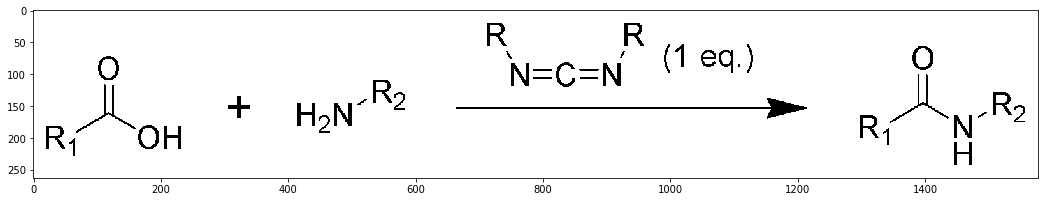

In [882]:
fig = plt.figure(figsize=(18, 4))
plt.imshow(plt.imread("../data/amide_coupling.png"))

So, $R_1$ could possibly be an aromatic carbon, a non-aromatic carbon or a hydrogen. The same holds for $R_2$.

### 7.1. Example of amide coupling

Let's try to write these patterns

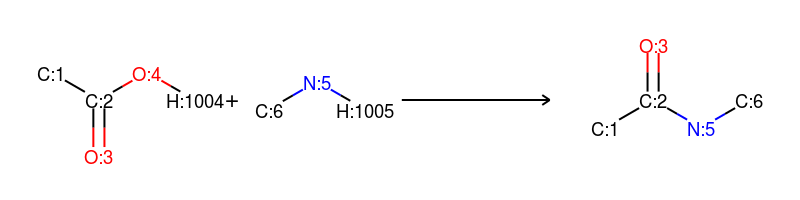

In [884]:
example_smirks = "[C:1][C:2](=[O:3])[O:4][H:1004].[H:1005][N:5][C:6]>>[C:1][C:2](=[O:3])[N:5][C:6]"
Draw.ReactionToImage(AllChem.ReactionFromSmarts(example_smirks, useSmiles=True))

In [885]:
print(canon_rea(example_smirks))

[H]-N-C.[H]-O-C(-C)=O>>C-N-C(-C)=O


Is this pattern in reaction types we have taken?

In [886]:
canon_rea(example_smirks) in reaction_types

True

### 7.2. Amide coupling pattern generator

Let's write a generator of patterns.

In [890]:
examples = []

for first in ["C", "c", "H"]:
    for second in ["C", "c", "H"]:
        examples.append("[{}:1][C:2](=[O:3])[O:4][H:1004].[H:1005][N:5][{}:6]>>[{}:1][C:2](=[O:3])[N:5][{}:6]"
            .format(first, second, first, second))
        
examples = [canon_rea(e) for e in examples]

In [891]:
examples

['[H]-N-C.[H]-O-C(-C)=O>>C-N-C(-C)=O',
 '[H]-N-c.[H]-O-C(-C)=O>>c-N-C(-C)=O',
 '[H]-N-[H].[H]-O-C(-C)=O>>[H]-N-C(-C)=O',
 '[H]-N-C.[H]-O-C(-c)=O>>C-N-C(-c)=O',
 '[H]-N-c.[H]-O-C(-c)=O>>c-N-C(-c)=O',
 '[H]-N-[H].[H]-O-C(-c)=O>>[H]-N-C(-c)=O',
 '[H]-N-C.[H]-O-C(-[H])=O>>[H]-C(=O)-N-C',
 '[H]-N-c.[H]-O-C(-[H])=O>>[H]-C(=O)-N-c',
 '[H]-N-[H].[H]-O-C(-[H])=O>>[H]-N-C(-[H])=O']

In [892]:
[e in reaction_types for e in examples]

[True, False, False, True, True, False, False, False, False]

# 8. Retrosynthesis dataframe

Now we are ready to build a retrosynthesis dataframe. It consists of two columns: molecules and reaction type used. By now we simplify the task. Suppose we have only two classes of reactions: amide coupling and non-amide-coupling.

In [896]:
%%time

reactions_df.loc[:, "canon_SMIRKS"] = reactions_df.SMIRKS.apply(canon_rea)

CPU times: user 1min 50s, sys: 40.8 ms, total: 1min 50s
Wall time: 1min 50s


In [899]:
reactions_df.loc[:, "product"] = reactions_df.canon_SMIRKS.apply(lambda s: s.split(">>")[1])

### 8.1. First group by reaction type so as to get classes

In [923]:
reaction_types = []

core_grouping = reactions_df.groupby("core_SMIRKS_unmapped")
for g in core_grouping:
    reaction_types.append(g[0])

In [924]:
reaction_types

['C-C(=O)-Cl.[H]-N-c>>c-N-C(-C)=O',
 'C-C-Br.[H]-O-c>>C-C-O-c',
 'C-S(=O)(=O)-Cl.[H]-O-C>>C-O-S(-C)(=O)=O',
 'C-[Si](-C)(-C)-Cl.[H]-O-C>>C-O-[Si](-C)(-C)-C',
 '[H]-C(-[H])(-[H])-C(-O-C(-C)=O)(-C(-[H])(-[H])-[H])-C(-[H])(-[H])-[H]>>[H]-O-C(-C)=O',
 '[H]-C(-[H])(-[H])-C(-O-C(=O)-N(-C)-C)(-C(-[H])(-[H])-[H])-C(-[H])(-[H])-[H]>>[H]-N(-C)-C',
 '[H]-C(-[H])(-[H])-C(-[H])(-[H])-O-C(-C)=O.[H]-N-C>>C-N-C(-C)=O',
 '[H]-C(-[H])(-[H])-C(-[H])(-[H])-O-C(-C)=O>>[H]-O-C(-C)=O',
 '[H]-C(-[H])(-[H])-C(-[H])(-[H])-O-C(-c)=O>>[H]-O-C(-c)=O',
 '[H]-C(-[H])(-[H])-C(=O)-O-C(-C)=O.[H]-N-C>>C-N-C(-C)=O',
 '[H]-C(-[H])(-[H])-C(=O)-O-C(-C)=O.[H]-N-c>>c-N-C(-C)=O',
 '[H]-C(-[H])(-[H])-O-C(-C)=O.[H]-N-C>>C-N-C(-C)=O',
 '[H]-C(-[H])(-[H])-O-C(-C)=O>>[H]-O-C(-C)=O',
 '[H]-C(-[H])(-[H])-O-C(-c)=O>>[H]-N(-[H])-N(-[H])-C(-c)=O',
 '[H]-C(-[H])(-[H])-O-C(-c)=O>>[H]-O-C(-c)=O',
 '[H]-C1(-[H])-C(=O)-N(-O-C(-C)=O)-C(=O)-C-1(-[H])-[H].[H]-N-C>>C-N-C(-C)=O',
 '[H]-N-C.[H]-O-C(-C)=O>>C-N-C(-C)=O',
 '[H]-N-C.[H]-O-C(-c)=O>>C-N

In [925]:
len(reaction_types)

22

In [926]:
amide_coupling_types = reaction_types[16:19]

In [928]:
g[1].core_SMIRKS_unmapped.values[0]

'c-N(=O)-O>>[H]-N(-[H])-c'

### 8.2. Group by product and see whether it could be otained by amide coupling

In [929]:
products = []

prd_grouping = reactions_df.groupby("product")
for g in prd_grouping:
    r_types = g[1].core_SMIRKS_unmapped.tolist()
    has_amide_coupling = any([r in amide_coupling_types for r in g[1].core_SMIRKS_unmapped.tolist()])
    products.append((g[0], has_amide_coupling))

In [932]:
retro_df = pd.DataFrame(products)
retro_df.columns = ["smiles", "is_coupling"]

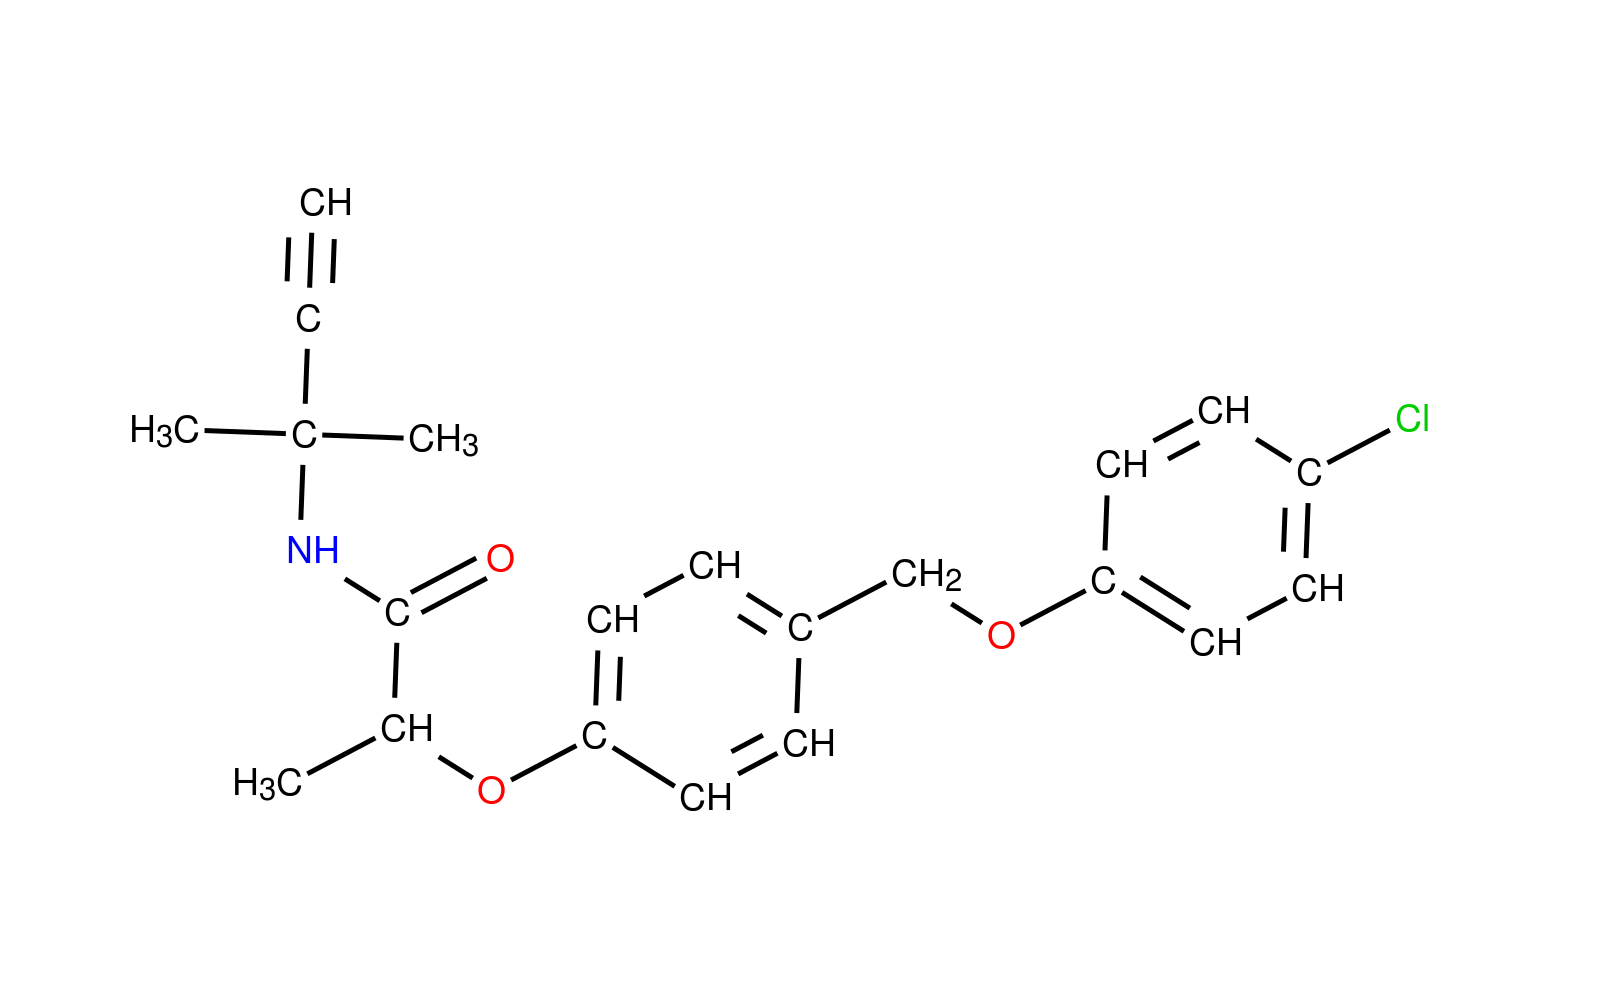

In [939]:
Draw.MolToImage(Chem.MolFromSmiles(retro_df.smiles[1]), size=(1600, 1000))

# 9. Let's do some ML!

In [991]:
molecules = retro_df.smiles.apply(Chem.MolFromSmiles)

In [992]:
molecules.shape[0], pd.isnull(molecules).sum()

(22146, 1094)

In [993]:
retro_df = retro_df.loc[~pd.isnull(molecules), :]
molecules = molecules.loc[~pd.isnull(molecules)]

In [994]:
molecules.shape

(21052,)

In [995]:
AllChem.GetMorganFingerprintAsBitVect(molecules[0], 1, nBits=1024).ToBitString()

'000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000010000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000101000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000100000000000000000000000000000000000000000000000000000000001000000000000000000000000

In [996]:
AllChem.GetMorganFingerprintAsBitVect(molecules[0], 1).ToBitString().count("1")

17

In [997]:
AllChem.GetMorganFingerprintAsBitVect(molecules[0], 2).ToBitString().count("1")

23

In [998]:
AllChem.GetMorganFingerprintAsBitVect(molecules[0], 3).ToBitString().count("1")

27

In [999]:
from functools import partial

In [1000]:
def fpFun(m):
    fps = AllChem.GetMorganFingerprintAsBitVect(m, radius=3, nBits=1024)
    bitString = fps.ToBitString()
    return [int(c) for c in bitString]

fps = np.array([fpFun(m) for m in molecules])

In [1001]:
fps.shape

(21052, 1024)

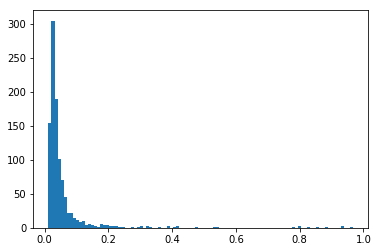

In [1002]:
plt.hist(fps.mean(axis=0), bins=100);

In [1003]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [1004]:
X = fps
Y = retro_df.is_coupling

In [1005]:
Y.mean()

0.44717841535246056

In [1006]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

In [1007]:
clf = LogisticRegression()
clf.fit(X_train, Y_train)
clf.score(X_val, Y_val)

0.87360688956433641

In [1011]:
amide_pattern = Chem.MolFromSmarts("C(=O)N")
molecules.apply(lambda m: m.HasSubstructMatch(amide_pattern)).mean()

0.86025080752422578

In [1012]:
amides = molecules.loc[molecules.apply(lambda m: m.HasSubstructMatch(amide_pattern))]

In [1014]:
def fpFun(m):
    fps = AllChem.GetMorganFingerprintAsBitVect(m, radius=3, nBits=1024)
    bitString = fps.ToBitString()
    return [int(c) for c in bitString]

fps = np.array([fpFun(m) for m in amides])
retro_df = retro_df.loc[molecules.apply(lambda m: m.HasSubstructMatch(amide_pattern)), :]

X = fps
Y = retro_df.is_coupling

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

clf = LogisticRegression()
clf.fit(X_train, Y_train)
clf.score(X_val, Y_val)

0.84982332155477036

In [1017]:
from sklearn.svm import LinearSVC

In [1024]:
clf = LinearSVC()
clf.fit(X_train, Y_train)
clf.score(X_val, Y_val)

0.85217903415783269

In [ ]:
Draw.MolToImage()

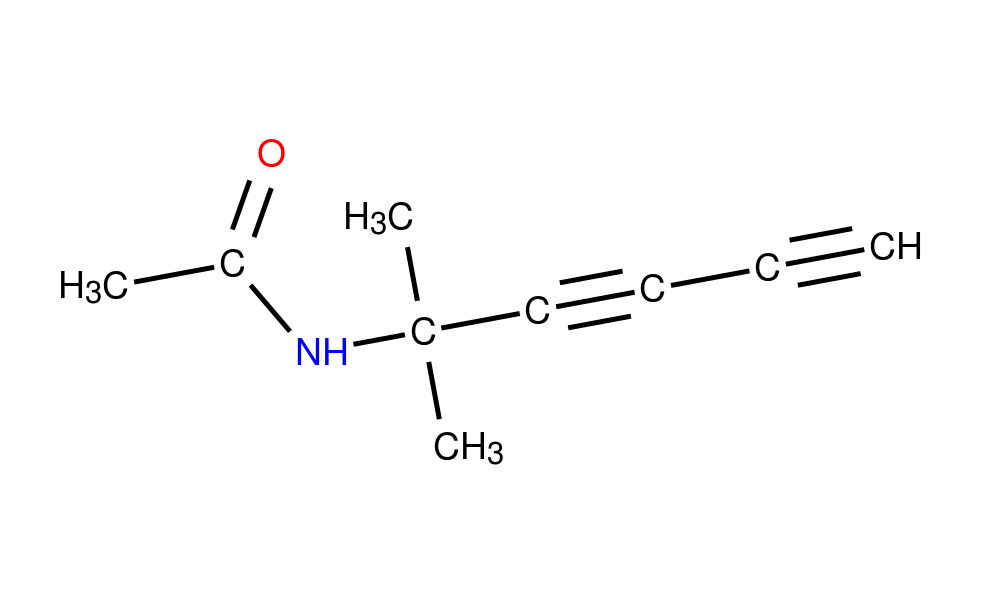

In [915]:
Draw.MolToImage(Chem.MolFromSmiles(prd), size=(1000, 600))

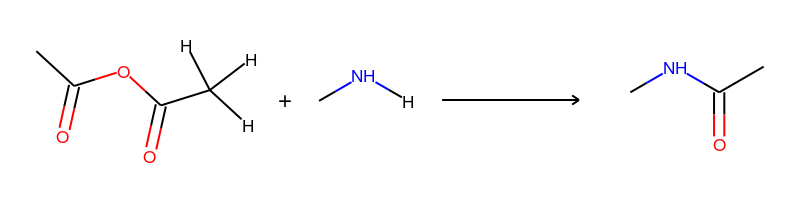

In [917]:
Draw.ReactionToImage(AllChem.ReactionFromSmarts(r_type, useSmiles=True))

In [783]:
p

'[H]-O-[C](-[C])=[O].[H]-[N]-[C]>>[C]-[C](=[O])-[N]-[C]'

In [454]:
rct_0, prd_0 = get_reaction_core(reactions[IDX - 1])

In [448]:
get_atoms_changed(reactions[IDX - 1])

[[0, 1, 2, 3, 4], [14]]

In [ ]:
4 - 13, 16, 24, 26, 43

In [360]:
IDX

45

Aromaticity, hydrogens, duplicates, [H], Cl, ...

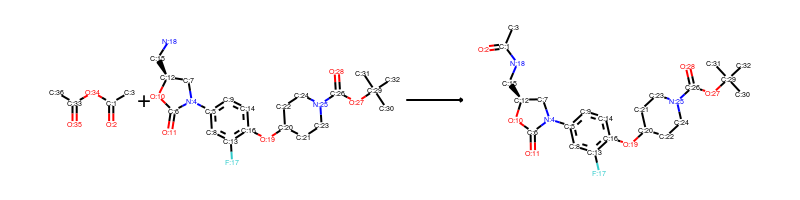

In [444]:
Draw.ReactionToImage(reactions[IDX - 1])

In [335]:
IDX

24

In [206]:
reaction = root.getchildren()[0].getchildren()[25]
d = [c for c in reaction.getchildren() if c.tag == "RX"][0]
rxnfile = [c for c in d.getchildren() if c.tag == "RX.RXNFILE"][0]

In [215]:
with open("../data/example.rxn", "w") as f:
    for line in decoded.split("\n"):
        f.write(line + "\n")

In [214]:
decoded.split("\n")

['$RXN',
 '',
 '',
 '',
 '  2  1',
 '$MOL',
 '',
 '  R>Mv4.0000000000002D 1   1.00000     0.00000     0',
 '',
 ' 12 12  0  0  0  0  0  0  0  0999 V2000',
 '    3.5001    2.2320    0.0000 C   0  0  0  0  0  0  0  0  0  1  0  0',
 '    2.5000    2.2320    0.0000 C   0  0  0  0  0  0  0  0  0  2  0  0',
 '    4.0001    3.0980    0.0000 C   0  0  0  0  0  0  0  0  0  3  0  0',
 '    4.0001    1.3660    0.0000 C   0  0  0  0  0  0  0  0  0  4  0  0',
 '    2.0000    1.3660    0.0000 C   0  0  0  0  0  0  0  0  0  5  0  0',
 '    2.0000    3.0980    0.0000 Br  0  0  0  0  0  0  0  0  0  6  0  0',
 '    5.0001    3.0980    0.0000 C   0  0  0  0  0  0  0  0  0  7  0  0',
 '    5.0001    1.3660    0.0000 C   0  0  0  0  0  0  0  0  0  8  0  0',
 '    1.0000    1.3660    0.0000 C   0  0  0  0  0  0  0  0  0  9  0  0',
 '    5.5001    2.2320    0.0000 C   0  0  0  0  0  0  0  0  0 10  0  0',
 '    0.5000    0.5000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0',
 '    0.5000    2.2320    0.000

In [207]:
import base64
import codecs
decoded = codecs.decode(base64.decodebytes(rxnfile.text.encode("utf-8")), "zlib").decode("utf-8")
# stripped = strip_sgroup_info(decoded)
rea = AllChem.ReactionFromRxnBlock(decoded)
smirks = AllChem.ReactionToSmarts(rea)

In [184]:
smirks

'[#6:1]12=[#6:2](-[#6:5](-[#6:10]3=[#6:16]-[#6:22]=[#6:25](-[#6:23]=[#6:17]-3)-[#7:26](=[#8:27])=[#8:28])-[#6:11]-[#6:9](-[#8:4]-1)(-[#6:14](-[#6:20])=[#6:21])-[#6:15])-[#6:6]=[#7:8]-[#7:3]-2-[#6:7]1-[#6:12]=[#6:18]-[#6:24]=[#6:19]-[#6:13]=1>>[#6:2]12(-[#6:5](-[#6:10]3-[#6:17]=[#6:23]-[#6:25](=[#6:22]-[#6:16]=3)-[#7:26](=[#8:27])=[#8:28])-[#6:11]-[#6:9](=[#6:14](-[#6:21]-1)-[#6:20])-[#6:15])-[#6:1](-[#7:3](-[#7:8]=[#6:6]-2)-[#6:7]1=[#6:12]-[#6:18]=[#6:24]-[#6:19]=[#6:13]-1)=[#8:4]'

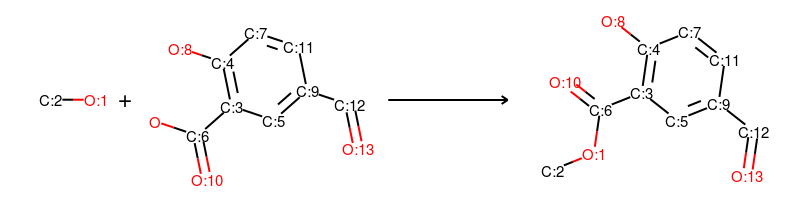

In [62]:
Draw.ReactionToImage(AllChem.ReactionFromSmarts(smirks))

In [55]:
rxnfile.text

'eJzllr1ywyAMx3c/BUNmH5IAw9KlyXWpk7sMvT5Jn7+A7RjzkUROt3IMoMM/JCH9k8P1+9z5IQQKAd1hvHyGzfVt/FG9TAYeBQh/ZDKKMGS6XhB+WZ3OOfGF/ni3fjqvUMvEdhEtRJzzBTPFU4eCF1bv9yl4o0Dpdjf6BJw+BEhnEV3Yns7H13IDGOZTucEeCeW04kVFSW5WCjEpKqH4b50NsfngNIuiEwr0ZIzcQzFVXyhQ4HnKUPWloDyoPLvxxRkFe97IVX2ReV4e+CI3XbB8W/hynwIpZY2IWS+QdqTqLck99QKYUHRvnKln90FEawdMfb1puclKebfHvSqtGIu4YjWllWKR5bepWDT5WRWLID+r43Pk1iFac8IQk55ZvQmKiGclQ6OktfA3Ska3NJezrWS8vm8pGa/v60rG7di6knEpdSWL2X9ZyQrKTiXjvVFdyYDXsdnv+apkLD1sKhmrXhpKxnzpjZKlus7LbksPeXn5x3ror4Lin11USWqppDPGkF5U8heuVbgZ'

In [44]:
AllChem.ReactionToSmarts()

ArgumentError: Python argument types in
    rdkit.Chem.rdChemReactions.ReactionToSmarts(lxml.etree._Element)
did not match C++ signature:
    ReactionToSmarts(RDKit::ChemicalReaction reaction)

In [42]:
rea_smirks = ""

NameError: name 'rea' is not defined

In [ ]:
def get_neighborhood(atom):
    mol = atom.GetOwningMol()
    neighbors = atom.GetNeighbors()
    neighbor_symbols = [a.GetSmarts() for a in neighbors]
    bonds = [mol.GetBondBetweenAtoms(atom.GetIdx(), n.GetIdx()) for n in neighbors]
    bond_types = [bond.GetBondTypeAsDouble() for bond in bonds]
    neighborhood = sorted([(b, s) for b, s in zip(bond_types, neighbor_symbols)])
    return neighborhood

def find_reaction_core(reactants, products):
    rct_atoms = [a for a in chain(*[r.GetAtoms() for r in reactants])]
    prd_atoms = [a for a in chain(*[p.GetAtoms() for p in products])]
    
    rct_atom_description_dict = dict([(a.GetAtomMapNum(), (a, get_neighborhood(a))) for a in rct_atoms])
    prd_atom_description_dict = dict([(a.GetAtomMapNum(), (a, get_neighborhood(a))) for a in prd_atoms])
    
    if 0 in rct_atom_description_dict:
        del rct_atom_description_dict[0]
    if 0 in prd_atom_description_dict:
        del prd_atom_description_dict[0]
    
    result  = [a for a in rct_atoms if a.GetAtomMapNum() == 0]
    result += [a for a in prd_atoms if a.GetAtomMapNum() == 0]
    
    for k, v in rct_atom_description_dict.items():
        if v[1] != prd_atom_description_dict[k][1]:
            print(v)
            result.append(v[0])
            
    return result

def extend_core(core_atoms):
    extended = [a.GetNeighbors() for a in core_atoms]
    result = [a for a in core_atoms]
    for a in chain(*extended):
        atom_class = a.GetAtomMapNum()
        result_atom_classes = [r_a.GetAtomMapNum() for r_a in result]
        if atom_class not in result_atom_classes and atom_class != 0:
            result.append(a)
    return result
            
def get_extended_core(reactants, products):
    core = find_reaction_core(reactants, products)
    return extend_core(core)